In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import numpy as np
from numpy.polynomial.polynomial import polyfit
import seaborn as sns
import calendar

import geopandas as gpd
from geopandas.tools import sjoin
import shapefile as shp

In [4]:

df1999 = pd.read_csv('/Users/anjalidoney/Downloads/resale-flat-prices/resale-flat-prices-based-on-approval-date-1990-1999.csv')
df2012 = pd.read_csv('/Users/anjalidoney/Downloads/resale-flat-prices/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
df2018 = pd.read_csv('/Users/anjalidoney/Downloads/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv')
df2014 = pd.read_csv('/Users/anjalidoney/Downloads/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')


In [5]:
testdf = df1999.append([df2012,df2014,df2018])
testdf.head(5)

block      flat_model flat_type  floor_area_sqm  lease_commence_date  \
0   309        IMPROVED    1 ROOM            31.0                 1977   
1   309        IMPROVED    1 ROOM            31.0                 1977   
2   309        IMPROVED    1 ROOM            31.0                 1977   
3   309        IMPROVED    1 ROOM            31.0                 1977   
4   216  NEW GENERATION    3 ROOM            73.0                 1976   

     month  remaining_lease  resale_price storey_range       street_name  \
0  1990-01              NaN        9000.0     10 TO 12  ANG MO KIO AVE 1   
1  1990-01              NaN        6000.0     04 TO 06  ANG MO KIO AVE 1   
2  1990-01              NaN        8000.0     10 TO 12  ANG MO KIO AVE 1   
3  1990-01              NaN        6000.0     07 TO 09  ANG MO KIO AVE 1   
4  1990-01              NaN       47200.0     04 TO 06  ANG MO KIO AVE 1   

         town  
0  ANG MO KIO  
1  ANG MO KIO  
2  ANG MO KIO  
3  ANG MO KIO  
4  ANG MO KIO

In [6]:
testdf.isnull().values.any()

True

In [7]:
testdf.corr(method='pearson')

floor_area_sqm  lease_commence_date  remaining_lease  \
floor_area_sqm             1.000000             0.504830         0.340287   
lease_commence_date        0.504830             1.000000         0.995742   
remaining_lease            0.340287             0.995742         1.000000   
resale_price               0.638417             0.491572         0.352230   

                     resale_price  
floor_area_sqm           0.638417  
lease_commence_date      0.491572  
remaining_lease          0.352230  
resale_price             1.000000

### Note 1: There is a high correlation between lease commence data and remaining lease, for logical reasons, so we should only use one of them

In [8]:
testdf[testdf.isnull().any(axis=1)]

block      flat_model  flat_type  floor_area_sqm  lease_commence_date  \
0       309        IMPROVED     1 ROOM            31.0                 1977   
1       309        IMPROVED     1 ROOM            31.0                 1977   
2       309        IMPROVED     1 ROOM            31.0                 1977   
3       309        IMPROVED     1 ROOM            31.0                 1977   
4       216  NEW GENERATION     3 ROOM            73.0                 1976   
5       211  NEW GENERATION     3 ROOM            67.0                 1977   
6       202  NEW GENERATION     3 ROOM            67.0                 1977   
7       235  NEW GENERATION     3 ROOM            67.0                 1977   
8       235  NEW GENERATION     3 ROOM            67.0                 1977   
9       232  NEW GENERATION     3 ROOM            67.0                 1977   
10      232  NEW GENERATION     3 ROOM            67.0                 1977   
11      308  NEW GENERATION     3 ROOM            82.0                 1976   
12      308  NEW GENERATION     3 ROOM            67.0                 1976   
13      220  NEW GENERATION     3 ROOM            67.0                 1977   
14      219  NEW GENERATION     3 ROOM            82.0                 1977   
15      247  NEW GENERATION     3 ROOM            82.0                 1978   
16      320  NEW GENERATION     3 ROOM            73.0                 1977   
17      252  NEW GENERATION     3 ROOM            67.0                 1977   
18      223  NEW GENERATION     3 ROOM            67.0                 1978   
19      223  NEW GENERATION     3 ROOM            67.0                 1978   
20      230  NEW GENERATION     3 ROOM            82.0                 1978   
21      329  NEW GENERATION     3 ROOM            73.0                 1978   
22      313  NEW GENERATION     3 ROOM            73.0                 1978   
23      117  NEW GENERATION     3 ROOM            74.0                 1978   
24      110  NEW GENERATION     3 ROOM            67.0                 1978   
25      343  NEW GENERATION     3 ROOM            73.0                 1978   
26      345  NEW GENERATION     3 ROOM            73.0                 1978   
27      346  NEW GENERATION     3 ROOM            73.0                 1978   
28      121  NEW GENERATION     3 ROOM            67.0                 1978   
29      129  NEW GENERATION     3 ROOM            73.0                 1979   
...     ...             ...        ...             ...                  ...   
52173   329      Simplified     4 ROOM            84.0                 1988   
52174   366         Model A     4 ROOM           108.0                 1988   
52175   216  New Generation     4 ROOM            93.0                 1985   
52176   259      Simplified     4 ROOM            84.0                 1986   
52177   260      Simplified     4 ROOM            84.0                 1985   
52178   609      Simplified     4 ROOM            84.0                 1986   
52179   637      Simplified     4 ROOM            85.0                 1987   
52180   721         Model A     4 ROOM           104.0                 1985   
52181   876      Simplified     4 ROOM            88.0                 1987   
52182   850         Model A     4 ROOM           104.0                 1988   
52183   868      Simplified     4 ROOM            84.0                 1987   
52184   868      Simplified     4 ROOM            84.0                 1987   
52185   821         Model A     4 ROOM           104.0                 1987   
52186   821         Model A     4 ROOM           104.0                 1987   
52187   733        Improved     5 ROOM           123.0                 1984   
52188   170        Improved     5 ROOM           131.0                 1986   
52189   935        Improved     5 ROOM           123.0                 1993   
52190  115B        Improved     5 ROOM           111.0                 2001   
52191   794        Improved     5 ROOM           121.0  

### Note 2: Use lease commence data rather than remaining lease (due to null values)

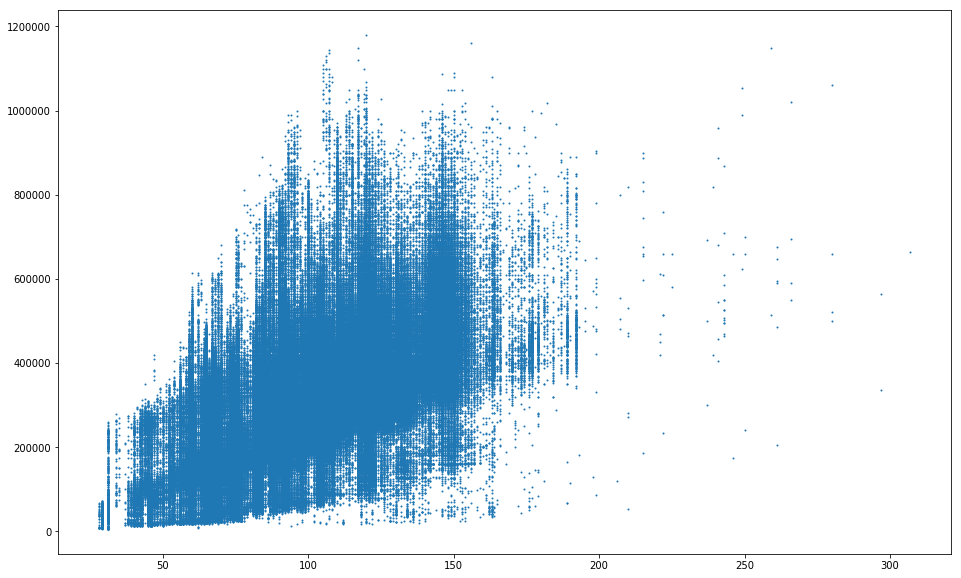

In [9]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.scatter(testdf.floor_area_sqm, testdf.resale_price,1)
plt.show()

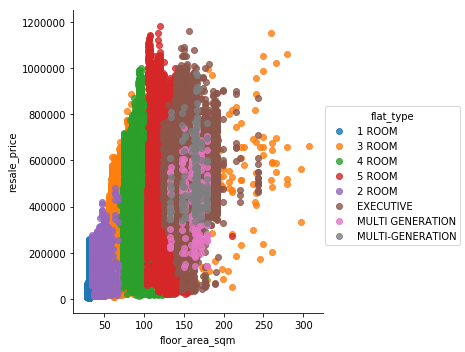

In [10]:
#fig, ax = plt.subplots()
#fig.set_size_inches(11.7, 8.27)

# plt.rcParams['figure.figsize'] = [20, 10]

plt.figure(figsize=(20,15))
sns.lmplot( x="floor_area_sqm", y="resale_price", data=testdf, fit_reg=False, hue='flat_type', scatter='true',legend=True)
 
# Move the legend to an empty part of the plot
#plt.legend(loc='lower right')


### This plot shows the strong correlation between floor area and flat type. Looking at the same for flat model:

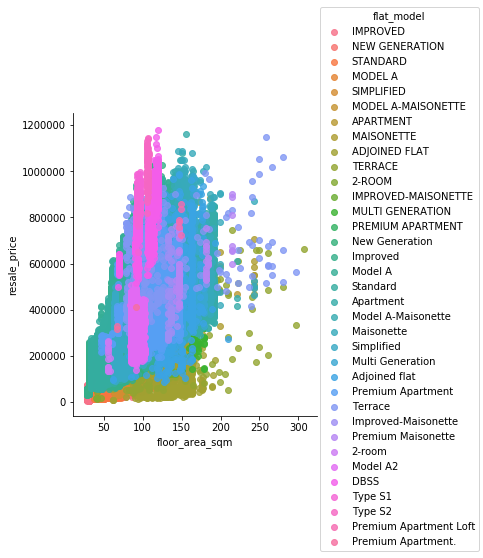

In [11]:
sns.lmplot( x="floor_area_sqm", y="resale_price", data=testdf, fit_reg=False, hue='flat_model', scatter='true',legend=True)

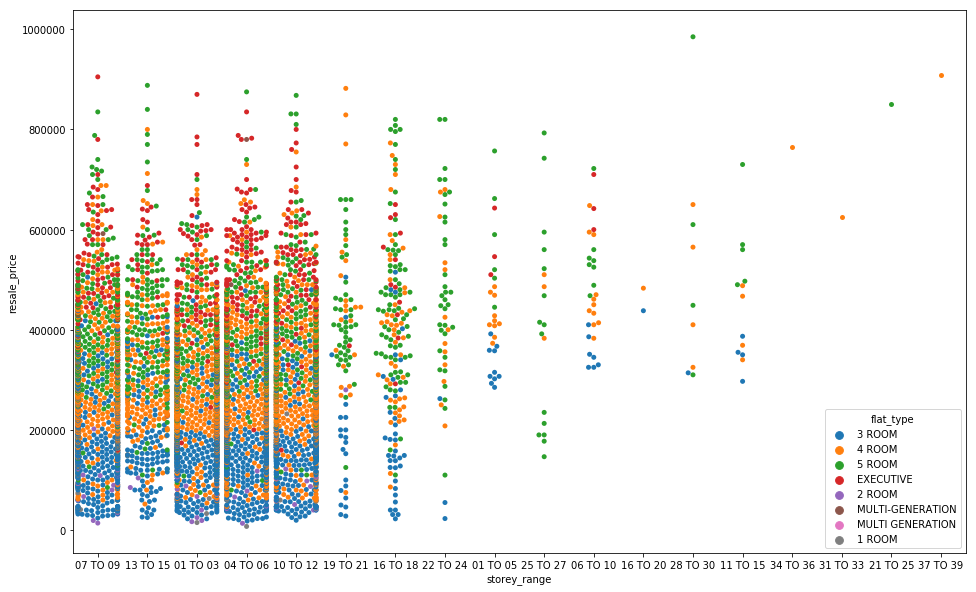

In [12]:
plotdf = testdf.sample(frac=0.01, random_state=1)

sns.swarmplot(x="storey_range", y="resale_price",data=plotdf,hue="flat_type")

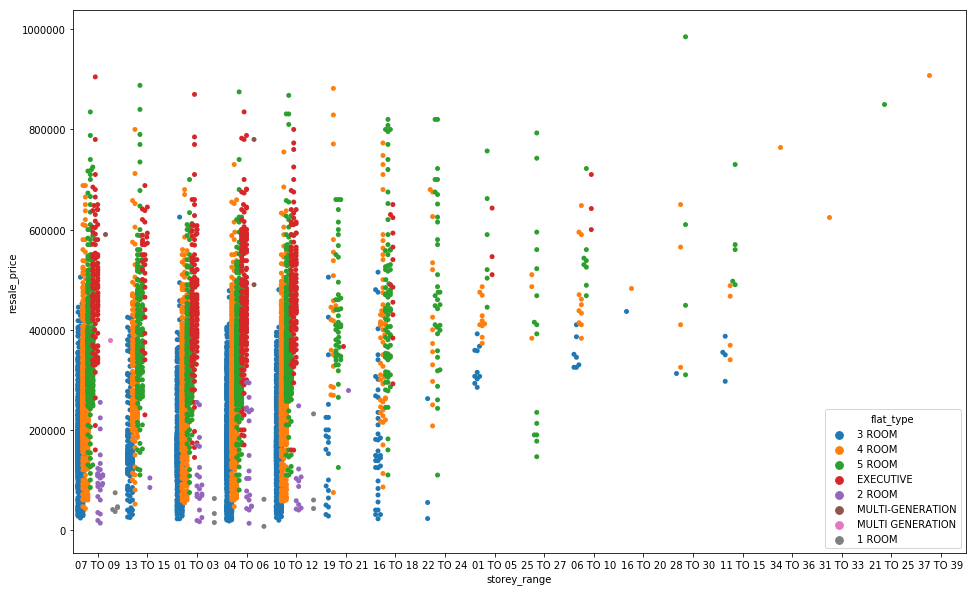

In [13]:
sns.swarmplot(x="storey_range", y="resale_price",data=plotdf,hue="flat_type",dodge=True)

In [14]:
testdf.dtypes

block                   object
flat_model              object
flat_type               object
floor_area_sqm         float64
lease_commence_date      int64
month                   object
remaining_lease        float64
resale_price           float64
storey_range            object
street_name             object
town                    object
dtype: object

### First let us look at relationship between numerical variables

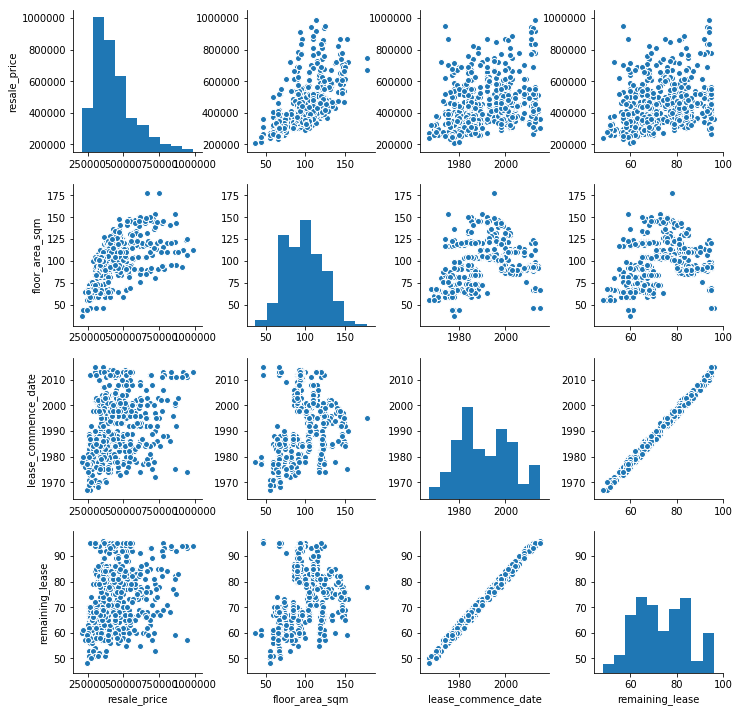

In [15]:
# sns.set()

subset = testdf[['resale_price', 'floor_area_sqm', 'lease_commence_date', 'remaining_lease']]
subset.head(5)

subset = subset.dropna()
cols = list(subset.columns.values)
plotdf2 = subset.sample(frac=0.01, random_state=1)

sns.pairplot(plotdf2[cols], size=2.5)
plt.show()


### Checking pairplots for full dataset (removing missing data)

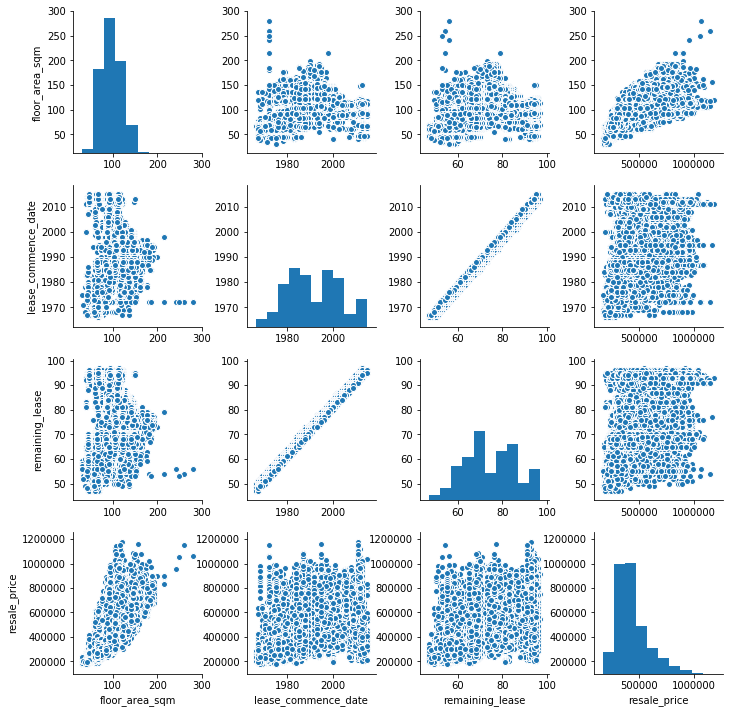

In [16]:
cols = list(testdf.columns.values)
testdfclean = testdf.dropna()

sns.pairplot(testdfclean[cols], size=2.5)
plt.show()


In [17]:
testdfclean.dtypes

block                   object
flat_model              object
flat_type               object
floor_area_sqm         float64
lease_commence_date      int64
month                   object
remaining_lease        float64
resale_price           float64
storey_range            object
street_name             object
town                    object
dtype: object

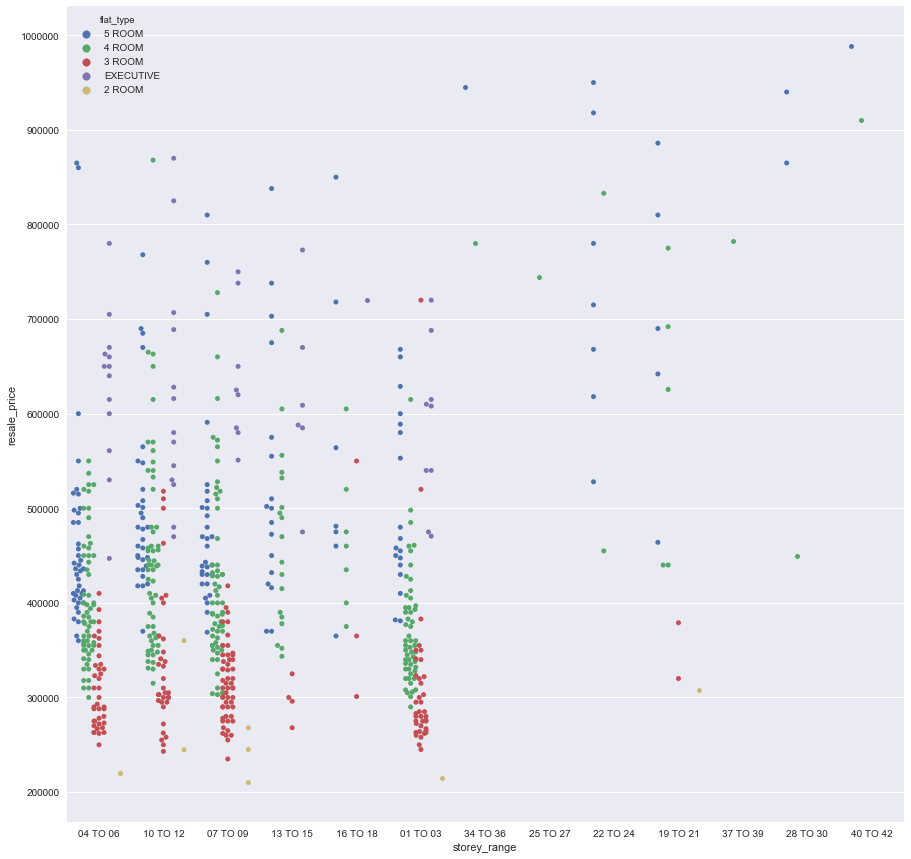

In [18]:
plt.figure(figsize=(15,15))
sns.set()
plotdf2 = testdfclean.sample(frac=0.01,random_state=1)
sns.swarmplot(x="storey_range", y="resale_price",data=plotdf2,hue="flat_type",dodge=True)
plt.show()

In [19]:
storey_sorted = sorted(testdf.storey_range.unique())
storey_sorted

['01 TO 03',
 '01 TO 05',
 '04 TO 06',
 '06 TO 10',
 '07 TO 09',
 '10 TO 12',
 '11 TO 15',
 '13 TO 15',
 '16 TO 18',
 '16 TO 20',
 '19 TO 21',
 '21 TO 25',
 '22 TO 24',
 '25 TO 27',
 '26 TO 30',
 '28 TO 30',
 '31 TO 33',
 '31 TO 35',
 '34 TO 36',
 '36 TO 40',
 '37 TO 39',
 '40 TO 42',
 '43 TO 45',
 '46 TO 48',
 '49 TO 51']

In [20]:
testdf['storey_range'] = testdf['storey_range'].astype('category')
testdf['storey_range'] = testdf['storey_range'].cat.reorder_categories(new_categories = storey_sorted, ordered=True)
testdf.storey_range.unique()

[10 TO 12, 04 TO 06, 07 TO 09, 01 TO 03, 13 TO 15, ..., 36 TO 40, 31 TO 35, 46 TO 48, 43 TO 45, 49 TO 51]
Length: 25
Categories (25, object): [01 TO 03 < 01 TO 05 < 04 TO 06 < 06 TO 10 ... 40 TO 42 < 43 TO 45 < 46 TO 48 < 49 TO 51]

In [23]:
testdf.dtypes

block                    object
flat_model               object
flat_type                object
floor_area_sqm          float64
lease_commence_date       int64
month                    object
remaining_lease         float64
resale_price            float64
storey_range           category
street_name              object
town                     object
dtype: object

/Users/anjalidoney/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1397: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


KeyboardInterrupt: 

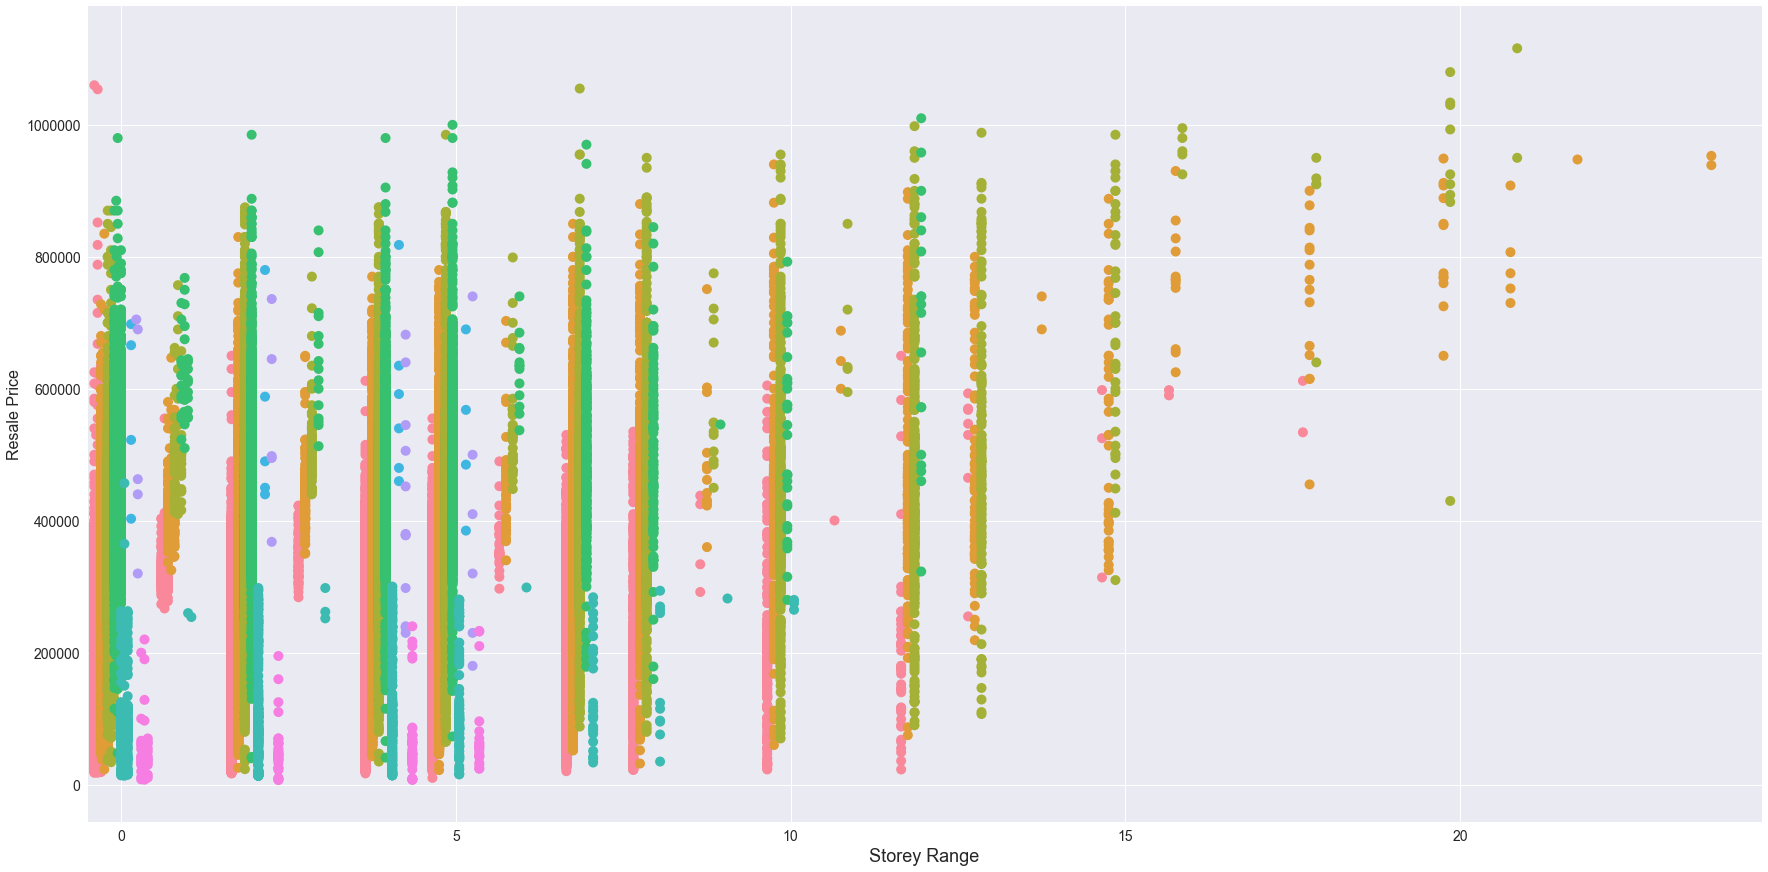

In [26]:
plt.figure(figsize=(30,15))
plt.rcParams['legend.fontsize'] = 22
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Storey Range', fontsize=18)
plt.ylabel('Resale Price', fontsize=16)



plotdf2 = testdf.sample(frac=0.1,random_state=1)
sns.swarmplot(x="storey_range", y="resale_price",data=plotdf2,hue="flat_type",dodge=True,size=10)

plt.show()

### Trying to see if storey_range is a strong enough factor. I can either turn it into a dummy numerical variable with different values, or to start with -  I'll check the resale prices for different storeys, for a specific flat, year and town. 

Really high floors definitely have high prices as seen in the scatter plot above

KeyboardInterrupt: 

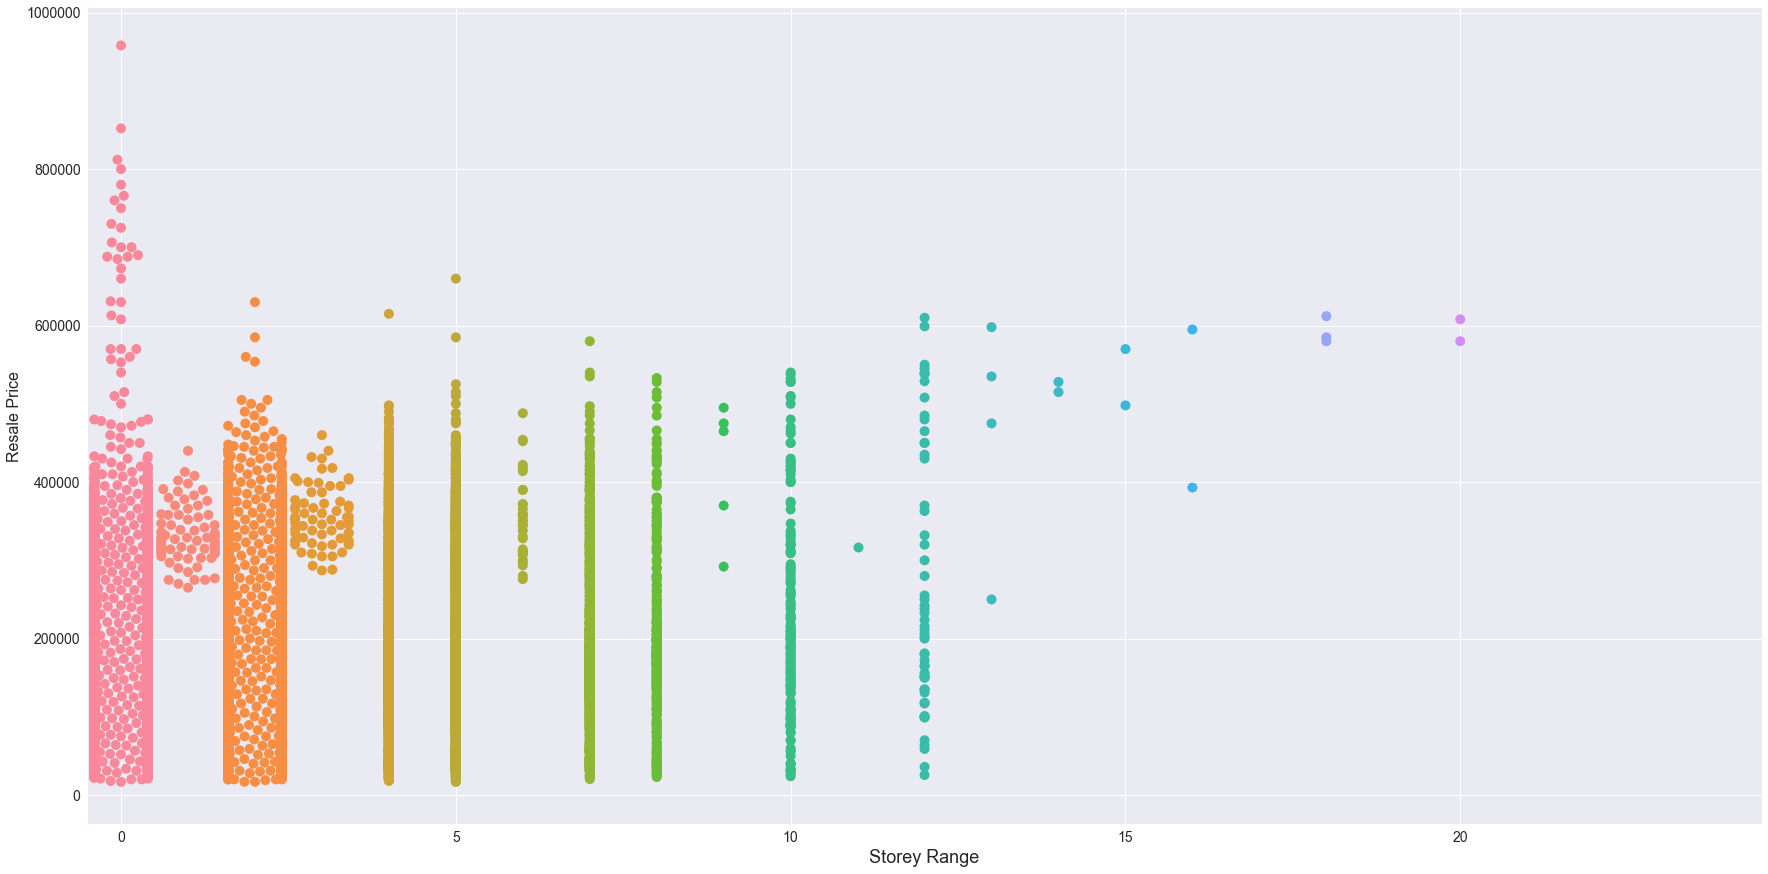

In [27]:
plt.figure(figsize=(30,15))
plt.rcParams['legend.fontsize'] = 22
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Storey Range', fontsize=18)
plt.ylabel('Resale Price', fontsize=16)

subdf = testdf.dropna(subset = ['storey_range', 'flat_type'])
subdf2 = subdf[subdf['flat_type']=='3 ROOM']
subdf3 = subdf2.sample(frac=0.1, random_state=1)
sns.swarmplot(x="storey_range", y="resale_price",data=subdf3,size=10)

plt.show()



#### Doing some of the transformations as we had done with the 2012-2018 datasets. 

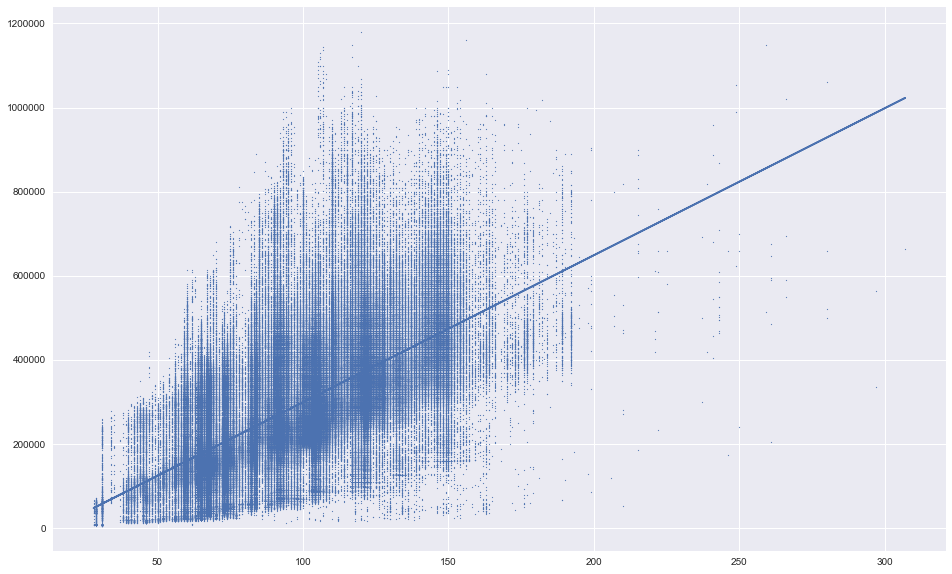

In [28]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.scatter(testdf.floor_area_sqm,testdf.resale_price,s=0.8)

b, m = polyfit(testdf.floor_area_sqm,testdf.resale_price, 1)

x = testdf.floor_area_sqm
plt.plot(x, b + m * x, '-')

plt.show()

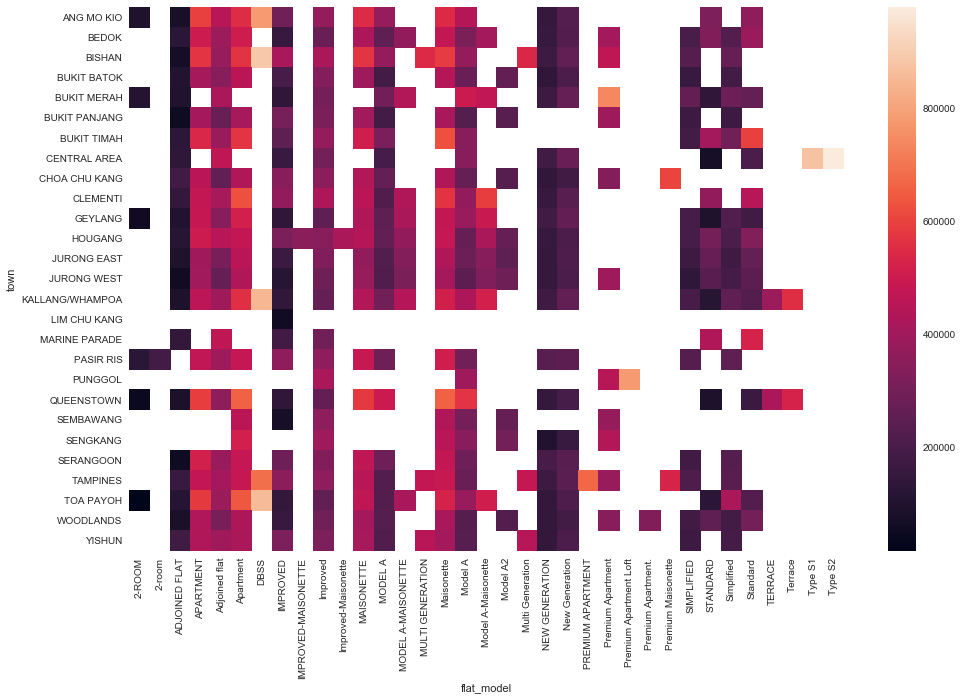

In [29]:
sns.set(style="whitegrid", palette="muted")

df = testdf.pivot_table(index='town', columns='flat_model', values='resale_price', aggfunc=np.median)
sns.heatmap(df, annot=False, fmt=".1f")

plt.show()

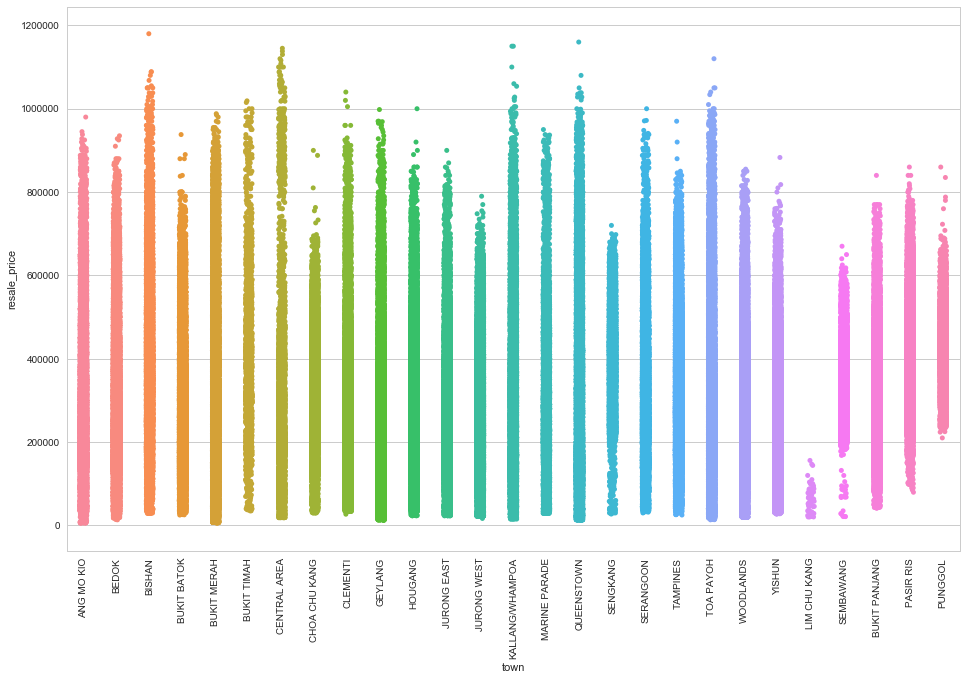

In [30]:
plt.xticks(rotation=90)
sns.stripplot(x="town", y="resale_price", data=testdf, jitter=True)
plt.show()

## Converting Month Column to Month Names and Year

In [31]:
testdf.month.head(5)

0    1990-01
1    1990-01
2    1990-01
3    1990-01
4    1990-01
Name: month, dtype: object

In [32]:
testdf.month.tail(5)

65246    2018-05
65247    2018-05
65248    2018-05
65249    2018-05
65250    2018-05
Name: month, dtype: object

In [33]:
testdf['month'] = pd.to_datetime(testdf['month'])
testdf['month_number']= testdf.month.dt.month
testdf.tail(5)

block  flat_model  flat_type  floor_area_sqm  lease_commence_date  \
65246   791   Apartment  EXECUTIVE           141.0                 1987   
65247   328   Apartment  EXECUTIVE           142.0                 1988   
65248   352  Maisonette  EXECUTIVE           154.0                 1988   
65249   723   Apartment  EXECUTIVE           142.0                 1986   
65250   828   Apartment  EXECUTIVE           142.0                 1988   

           month  remaining_lease  resale_price storey_range     street_name  \
65246 2018-05-01             68.0      535000.0     04 TO 06    YISHUN AVE 2   
65247 2018-05-01             69.0      528888.0     07 TO 09  YISHUN RING RD   
65248 2018-05-01             69.0      535000.0     10 TO 12  YISHUN RING RD   
65249 2018-05-01             67.0      582888.0     10 TO 12    YISHUN ST 71   
65250 2018-05-01             68.0      658000.0     07 TO 09    YISHUN ST 81   

         town  month_number  
65246  YISHUN             5  
65247  YISHUN             5  
65248  YISHUN             5  
65249  YISHUN             5  
65250  YISHUN             5

In [34]:
testdf['month_name'] = testdf['month_number'].apply(lambda x: calendar.month_name[x])

testdf.tail(5)

block  flat_model  flat_type  floor_area_sqm  lease_commence_date  \
65246   791   Apartment  EXECUTIVE           141.0                 1987   
65247   328   Apartment  EXECUTIVE           142.0                 1988   
65248   352  Maisonette  EXECUTIVE           154.0                 1988   
65249   723   Apartment  EXECUTIVE           142.0                 1986   
65250   828   Apartment  EXECUTIVE           142.0                 1988   

           month  remaining_lease  resale_price storey_range     street_name  \
65246 2018-05-01             68.0      535000.0     04 TO 06    YISHUN AVE 2   
65247 2018-05-01             69.0      528888.0     07 TO 09  YISHUN RING RD   
65248 2018-05-01             69.0      535000.0     10 TO 12  YISHUN RING RD   
65249 2018-05-01             67.0      582888.0     10 TO 12    YISHUN ST 71   
65250 2018-05-01             68.0      658000.0     07 TO 09    YISHUN ST 81   

         town  month_number month_name  
65246  YISHUN             5        May  
65247  YISHUN             5        May  
65248  YISHUN             5        May  
65249  YISHUN             5        May  
65250  YISHUN             5        May

In [35]:
testdf['year']= testdf.month.dt.year
testdf.tail(5)

block  flat_model  flat_type  floor_area_sqm  lease_commence_date  \
65246   791   Apartment  EXECUTIVE           141.0                 1987   
65247   328   Apartment  EXECUTIVE           142.0                 1988   
65248   352  Maisonette  EXECUTIVE           154.0                 1988   
65249   723   Apartment  EXECUTIVE           142.0                 1986   
65250   828   Apartment  EXECUTIVE           142.0                 1988   

           month  remaining_lease  resale_price storey_range     street_name  \
65246 2018-05-01             68.0      535000.0     04 TO 06    YISHUN AVE 2   
65247 2018-05-01             69.0      528888.0     07 TO 09  YISHUN RING RD   
65248 2018-05-01             69.0      535000.0     10 TO 12  YISHUN RING RD   
65249 2018-05-01             67.0      582888.0     10 TO 12    YISHUN ST 71   
65250 2018-05-01             68.0      658000.0     07 TO 09    YISHUN ST 81   

         town  month_number month_name  year  
65246  YISHUN             5        May  2018  
65247  YISHUN             5        May  2018  
65248  YISHUN             5        May  2018  
65249  YISHUN             5        May  2018  
65250  YISHUN             5        May  2018

In [36]:
testdf.flat_type.unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [46]:
testdf.flat_model.unique()

array(['IMPROVED', 'NEW GENERATION', 'STANDARD', 'MODEL A', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'ADJOINED FLAT',
       'TERRACE', '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'New Generation', 'Improved', 'Model A',
       'Standard', 'Apartment', 'Model A-Maisonette', 'Maisonette',
       'Simplified', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', 'Premium Apartment.'], dtype=object)

### Renaming and merging same variables named differently in flat_type and flat_model

In [44]:
testdf['flat_type'] = testdf['flat_type'].replace({'MULTI GENERATION': 'MULTI-GENERATION'})

testdf['flat_type'].head(5)

0    1 ROOM
1    1 ROOM
2    1 ROOM
3    1 ROOM
4    3 ROOM
Name: flat_type, dtype: object

In [45]:
testdf['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION'], dtype=object)

In [51]:
testdf['flat_model'] = testdf['flat_model'].replace({'Model A': 'MODEL A',
                                                     'Standard':'STANDARD',
                                                     'New Generation': 'NEW GENERATION',
                                                     'Apartment': 'APARTMENT',
                                                     'Improved': 'IMPROVED',
                                                     'Model A-Maisonette': 'MODEL A-MAISONETTE',
                                                     'Maisonette': 'MAISONETTE',
                                                     'Multi Generation': 'MULTI-GENERATION',
                                                     'MULTI GENERATION': 'MULTI-GENERATION',
                                                     'Adjoined flat': 'ADJOINED FLAT',
                                                     'Premium Apartment':'PREMIUM APARTMENT',
                                                     'Terrace': 'TERRACE',
                                                     'Improved-Maisonette': 'IMPROVED-MAISONETTE',
                                                     '2-room': '2-ROOM',
                                                     'Premium Apartment.':'PREMIUM APARTMENT',
                                                     'Simplified':'SIMPLIFIED'
                                                    })

testdf['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'STANDARD', 'MODEL A', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'ADJOINED FLAT',
       'TERRACE', '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI-GENERATION',
       'PREMIUM APARTMENT', 'Premium Maisonette', 'Model A2', 'DBSS',
       'Type S1', 'Type S2', 'Premium Apartment Loft'], dtype=object)

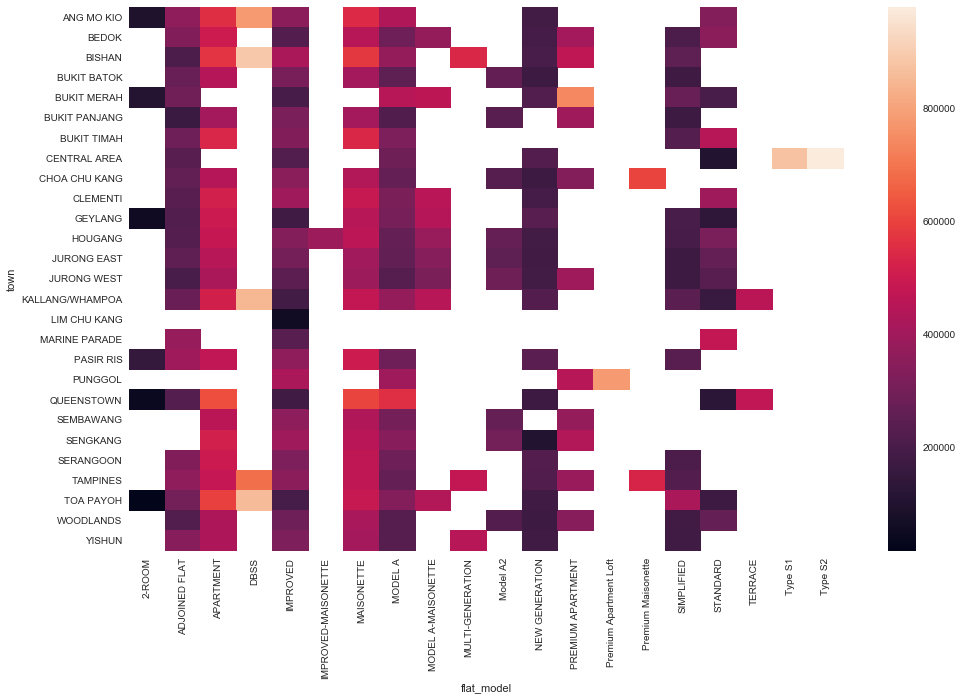

In [52]:
sns.set(style="whitegrid", palette="muted")

df = testdf.pivot_table(index='town', columns='flat_model', values='resale_price', aggfunc=np.median)
sns.heatmap(df, annot=False, fmt=".1f")

plt.show()

### Adding no. of Bedrooms and Bathrooms

In [53]:
bedroom_dict = {'1 ROOM':1, '2 ROOM': 1, '3 ROOM':2, '4 ROOM':3, '5 ROOM':3, 'EXECUTIVE':3, 'MULTI-GENERATION':4}
bathroom_dict = {'1 ROOM':1, '2 ROOM': 1, '3 ROOM':2, '4 ROOM':2, '5 ROOM':2, 'EXECUTIVE':2, 'MULTI-GENERATION':3}
testdf['bedrooms'] = testdf['flat_type'].map(bedroom_dict)
testdf['bathrooms'] = testdf['flat_type'].map(bathroom_dict)
testdf.head(5)

block      flat_model flat_type  floor_area_sqm  lease_commence_date  \
0   309        IMPROVED    1 ROOM            31.0                 1977   
1   309        IMPROVED    1 ROOM            31.0                 1977   
2   309        IMPROVED    1 ROOM            31.0                 1977   
3   309        IMPROVED    1 ROOM            31.0                 1977   
4   216  NEW GENERATION    3 ROOM            73.0                 1976   

       month  remaining_lease  resale_price storey_range       street_name  \
0 1990-01-01              NaN        9000.0     10 TO 12  ANG MO KIO AVE 1   
1 1990-01-01              NaN        6000.0     04 TO 06  ANG MO KIO AVE 1   
2 1990-01-01              NaN        8000.0     10 TO 12  ANG MO KIO AVE 1   
3 1990-01-01              NaN        6000.0     07 TO 09  ANG MO KIO AVE 1   
4 1990-01-01              NaN       47200.0     04 TO 06  ANG MO KIO AVE 1   

         town  month_number month_name  year  bedrooms  bathrooms  
0  ANG MO KIO             1    January  1990         1          1  
1  ANG MO KIO             1    January  1990         1          1  
2  ANG MO KIO             1    January  1990         1          1  
3  ANG MO KIO             1    January  1990         1          1  
4  ANG MO KIO             1    January  1990         2          2

### Adding Town Population, Residential Land Area by year and town and calculated Population Density

In [144]:
townpop = pd.read_csv('estimated-resident-population-in-hdb-flats-by-town.csv')

In [145]:
townpop.head(5)

financial_year town_or_estate  population
0            2008     Ang Mo Kio      148200
1            2008          Bedok      197900
2            2008         Bishan       66500
3            2008    Bukit Batok      109100
4            2008    Bukit Merah      140600

### NOTE: Town population dataset only contains data from 2008 to 2016. So there will be NAs against other years.

In [146]:
testdf["townyear"] = testdf["town"] + testdf["year"].map(str)
testdf.head(5)

block      flat_model flat_type  floor_area_sqm  lease_commence_date  \
0   309        IMPROVED    1 ROOM            31.0                 1977   
1   309        IMPROVED    1 ROOM            31.0                 1977   
2   309        IMPROVED    1 ROOM            31.0                 1977   
3   309        IMPROVED    1 ROOM            31.0                 1977   
4   216  NEW GENERATION    3 ROOM            73.0                 1976   

       month  remaining_lease  resale_price storey_range       street_name  \
0 1990-01-01              NaN        9000.0     10 TO 12  ANG MO KIO AVE 1   
1 1990-01-01              NaN        6000.0     04 TO 06  ANG MO KIO AVE 1   
2 1990-01-01              NaN        8000.0     10 TO 12  ANG MO KIO AVE 1   
3 1990-01-01              NaN        6000.0     07 TO 09  ANG MO KIO AVE 1   
4 1990-01-01              NaN       47200.0     04 TO 06  ANG MO KIO AVE 1   

         town  month_number month_name  year  bedrooms  bathrooms  \
0  ANG MO KIO             1    January  1990         1          1   
1  ANG MO KIO             1    January  1990         1          1   
2  ANG MO KIO             1    January  1990         1          1   
3  ANG MO KIO             1    January  1990         1          1   
4  ANG MO KIO             1    January  1990         2          2   

         townyear  
0  ANG MO KIO1990  
1  ANG MO KIO1990  
2  ANG MO KIO1990  
3  ANG MO KIO1990  
4  ANG MO KIO1990

In [154]:
townpop.town_or_estate.unique()

array(['Ang Mo Kio', 'Bedok', 'Bishan', 'Bukit Batok', 'Bukit Merah',
       'Bukit Panjang', 'Bukit Timah', 'Choa Chu Kang', 'Central Area',
       'Clementi', 'Geylang', 'Hougang', 'Jurong East', 'Jurong West',
       'Kallang/Whampoa', 'Marine Parade', 'Pasir Ris', 'Punggol',
       'Queenstown', 'Sembawang', 'Sengkang', 'Serangoon', 'Tampines',
       'Toa Payoh', 'Woodlands', 'Yishun', 'Total'], dtype=object)

In [155]:
townpop["townyear"] = townpop["town_or_estate"] + townpop["financial_year"].map(str)
townpop.head(5)

financial_year town_or_estate  population         townyear
0            2008     Ang Mo Kio      148200   Ang Mo Kio2008
1            2008          Bedok      197900        Bedok2008
2            2008         Bishan       66500       Bishan2008
3            2008    Bukit Batok      109100  Bukit Batok2008
4            2008    Bukit Merah      140600  Bukit Merah2008

In [156]:
testdf.shape

(775249, 17)

In [157]:
testdf.townyear.to_string
townpop.townyear.to_string
townpop['townyear'] = townpop['townyear'].map(lambda x: str(x).upper())
townpop.head(5)

financial_year town_or_estate  population         townyear
0            2008     Ang Mo Kio      148200   ANG MO KIO2008
1            2008          Bedok      197900        BEDOK2008
2            2008         Bishan       66500       BISHAN2008
3            2008    Bukit Batok      109100  BUKIT BATOK2008
4            2008    Bukit Merah      140600  BUKIT MERAH2008

In [158]:
checkdf = testdf.merge(right=townpop, how='left', on="townyear")
checkdf.head(5)

block      flat_model flat_type  floor_area_sqm  lease_commence_date  \
0   309        IMPROVED    1 ROOM            31.0                 1977   
1   309        IMPROVED    1 ROOM            31.0                 1977   
2   309        IMPROVED    1 ROOM            31.0                 1977   
3   309        IMPROVED    1 ROOM            31.0                 1977   
4   216  NEW GENERATION    3 ROOM            73.0                 1976   

       month  remaining_lease  resale_price storey_range       street_name  \
0 1990-01-01              NaN        9000.0     10 TO 12  ANG MO KIO AVE 1   
1 1990-01-01              NaN        6000.0     04 TO 06  ANG MO KIO AVE 1   
2 1990-01-01              NaN        8000.0     10 TO 12  ANG MO KIO AVE 1   
3 1990-01-01              NaN        6000.0     07 TO 09  ANG MO KIO AVE 1   
4 1990-01-01              NaN       47200.0     04 TO 06  ANG MO KIO AVE 1   

         town  month_number month_name  year  bedrooms  bathrooms  \
0  ANG MO KIO             1    January  1990         1          1   
1  ANG MO KIO             1    January  1990         1          1   
2  ANG MO KIO             1    January  1990         1          1   
3  ANG MO KIO             1    January  1990         1          1   
4  ANG MO KIO             1    January  1990         2          2   

         townyear  financial_year town_or_estate  population  
0  ANG MO KIO1990             NaN            NaN         NaN  
1  ANG MO KIO1990             NaN            NaN         NaN  
2  ANG MO KIO1990             NaN            NaN         NaN  
3  ANG MO KIO1990             NaN            NaN         NaN  
4  ANG MO KIO1990             NaN            NaN         NaN

In [159]:
checkdf.drop(['financial_year','town_or_estate'], axis=1, inplace=True)
checkdf.head(5)

block      flat_model flat_type  floor_area_sqm  lease_commence_date  \
0   309        IMPROVED    1 ROOM            31.0                 1977   
1   309        IMPROVED    1 ROOM            31.0                 1977   
2   309        IMPROVED    1 ROOM            31.0                 1977   
3   309        IMPROVED    1 ROOM            31.0                 1977   
4   216  NEW GENERATION    3 ROOM            73.0                 1976   

       month  remaining_lease  resale_price storey_range       street_name  \
0 1990-01-01              NaN        9000.0     10 TO 12  ANG MO KIO AVE 1   
1 1990-01-01              NaN        6000.0     04 TO 06  ANG MO KIO AVE 1   
2 1990-01-01              NaN        8000.0     10 TO 12  ANG MO KIO AVE 1   
3 1990-01-01              NaN        6000.0     07 TO 09  ANG MO KIO AVE 1   
4 1990-01-01              NaN       47200.0     04 TO 06  ANG MO KIO AVE 1   

         town  month_number month_name  year  bedrooms  bathrooms  \
0  ANG MO KIO             1    January  1990         1          1   
1  ANG MO KIO             1    January  1990         1          1   
2  ANG MO KIO             1    January  1990         1          1   
3  ANG MO KIO             1    January  1990         1          1   
4  ANG MO KIO             1    January  1990         2          2   

         townyear  population  
0  ANG MO KIO1990         NaN  
1  ANG MO KIO1990         NaN  
2  ANG MO KIO1990         NaN  
3  ANG MO KIO1990         NaN  
4  ANG MO KIO1990         NaN

In [160]:
checkdf.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS', 'PUNGGOL'], dtype=object)

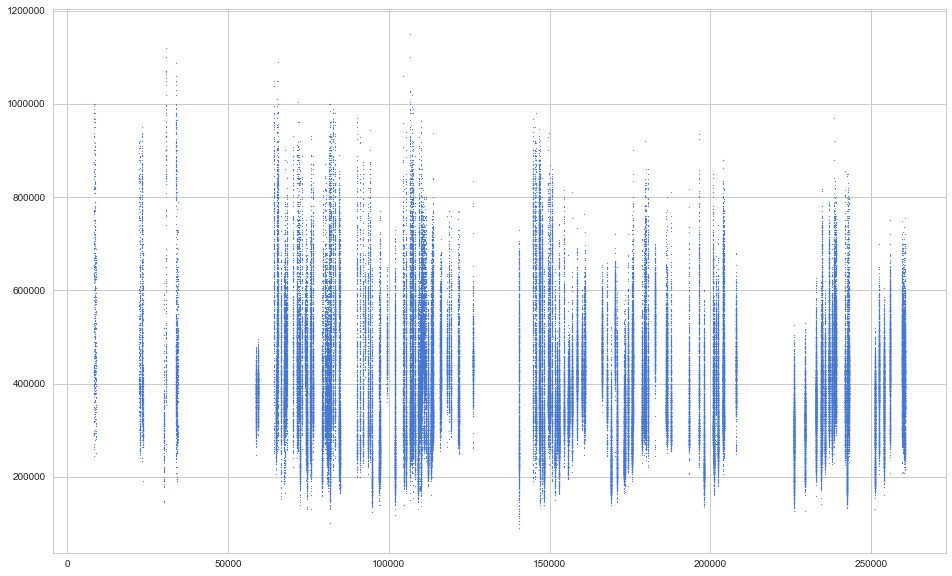

In [161]:
plt.scatter(checkdf.population,checkdf.resale_price,s=0.8)

# b, m = polyfit(checkdf.resale_price,checkdf.population, 1)

# x = checkdf.population
# plt.plot(x, b + m * x, '-')

plt.show()

In [162]:
townsize = pd.read_csv('land-area-and-dwelling-units-by-town.csv')

In [163]:
townsize.head(5)

financial_year         town total_land_area  residential_land_area  \
0            2008   Ang Mo Kio             638                    283   
1            2008        Bedok             937                    408   
2            2008       Bishan             690                    172   
3            2008  Bukit Batok             785                    291   
4            2008  Bukit Merah             858                    312   

   dwelling_units_under_management  projected_ultimate_dwelling_units  
0                            48069                              58000  
1                            59929                              74000  
2                            19367                              32000  
3                            31731                              47000  
4                            50247                              68000

In [164]:
townsize.town.unique()

array(['Ang Mo Kio', 'Bedok', 'Bishan', 'Bukit Batok', 'Bukit Merah',
       'Bukit Panjang', 'Choa Chu Kang', 'Clementi', 'Geylang', 'Hougang',
       'Jurong East', 'Jurong West', 'Kallang/ Whampoa', 'Pasir Ris',
       'Punggol', 'Queenstown', 'Sembawang', 'Sengkang', 'Serangoon',
       'Tampines', 'Toa Payoh', 'Woodlands', 'Yishun', 'Other Estates'], dtype=object)

In [165]:
townsize['town'] = townsize['town'].replace({'Kallang/ Whampoa': 'Kallang/Whampoa'})

In [167]:
townsize['townyear'] = townsize['town'] + townsize['financial_year'].map(str)
townsize['townyear'] = townsize['townyear'].map(lambda x: str(x).upper())
townsize.head(5)

financial_year         town total_land_area  residential_land_area  \
0            2008   Ang Mo Kio             638                    283   
1            2008        Bedok             937                    408   
2            2008       Bishan             690                    172   
3            2008  Bukit Batok             785                    291   
4            2008  Bukit Merah             858                    312   

   dwelling_units_under_management  projected_ultimate_dwelling_units  \
0                            48069                              58000   
1                            59929                              74000   
2                            19367                              32000   
3                            31731                              47000   
4                            50247                              68000   

          townyear  
0   ANG MO KIO2008  
1        BEDOK2008  
2       BISHAN2008  
3  BUKIT BATOK2008  
4  BUKIT MERAH2008

In [168]:
checkdf2 = checkdf.merge(right=townsize[['townyear','residential_land_area']], how='left', on="townyear")

In [169]:
checkdf2.head(5)

block      flat_model flat_type  floor_area_sqm  lease_commence_date  \
0   309        IMPROVED    1 ROOM            31.0                 1977   
1   309        IMPROVED    1 ROOM            31.0                 1977   
2   309        IMPROVED    1 ROOM            31.0                 1977   
3   309        IMPROVED    1 ROOM            31.0                 1977   
4   216  NEW GENERATION    3 ROOM            73.0                 1976   

       month  remaining_lease  resale_price storey_range       street_name  \
0 1990-01-01              NaN        9000.0     10 TO 12  ANG MO KIO AVE 1   
1 1990-01-01              NaN        6000.0     04 TO 06  ANG MO KIO AVE 1   
2 1990-01-01              NaN        8000.0     10 TO 12  ANG MO KIO AVE 1   
3 1990-01-01              NaN        6000.0     07 TO 09  ANG MO KIO AVE 1   
4 1990-01-01              NaN       47200.0     04 TO 06  ANG MO KIO AVE 1   

         town  month_number month_name  year  bedrooms  bathrooms  \
0  ANG MO KIO             1    January  1990         1          1   
1  ANG MO KIO             1    January  1990         1          1   
2  ANG MO KIO             1    January  1990         1          1   
3  ANG MO KIO             1    January  1990         1          1   
4  ANG MO KIO             1    January  1990         2          2   

         townyear  population  residential_land_area  
0  ANG MO KIO1990         NaN                    NaN  
1  ANG MO KIO1990         NaN                    NaN  
2  ANG MO KIO1990         NaN                    NaN  
3  ANG MO KIO1990         NaN                    NaN  
4  ANG MO KIO1990         NaN                    NaN

In [170]:
checkdf2['popdensity'] = checkdf2.population/checkdf2.residential_land_area

In [171]:
checkdf2.head(5)

block      flat_model flat_type  floor_area_sqm  lease_commence_date  \
0   309        IMPROVED    1 ROOM            31.0                 1977   
1   309        IMPROVED    1 ROOM            31.0                 1977   
2   309        IMPROVED    1 ROOM            31.0                 1977   
3   309        IMPROVED    1 ROOM            31.0                 1977   
4   216  NEW GENERATION    3 ROOM            73.0                 1976   

       month  remaining_lease  resale_price storey_range       street_name  \
0 1990-01-01              NaN        9000.0     10 TO 12  ANG MO KIO AVE 1   
1 1990-01-01              NaN        6000.0     04 TO 06  ANG MO KIO AVE 1   
2 1990-01-01              NaN        8000.0     10 TO 12  ANG MO KIO AVE 1   
3 1990-01-01              NaN        6000.0     07 TO 09  ANG MO KIO AVE 1   
4 1990-01-01              NaN       47200.0     04 TO 06  ANG MO KIO AVE 1   

         town  month_number month_name  year  bedrooms  bathrooms  \
0  ANG MO KIO             1    January  1990         1          1   
1  ANG MO KIO             1    January  1990         1          1   
2  ANG MO KIO             1    January  1990         1          1   
3  ANG MO KIO             1    January  1990         1          1   
4  ANG MO KIO             1    January  1990         2          2   

         townyear  population  residential_land_area  popdensity  
0  ANG MO KIO1990         NaN                    NaN         NaN  
1  ANG MO KIO1990         NaN                    NaN         NaN  
2  ANG MO KIO1990         NaN                    NaN         NaN  
3  ANG MO KIO1990         NaN                    NaN         NaN  
4  ANG MO KIO1990         NaN                    NaN         NaN

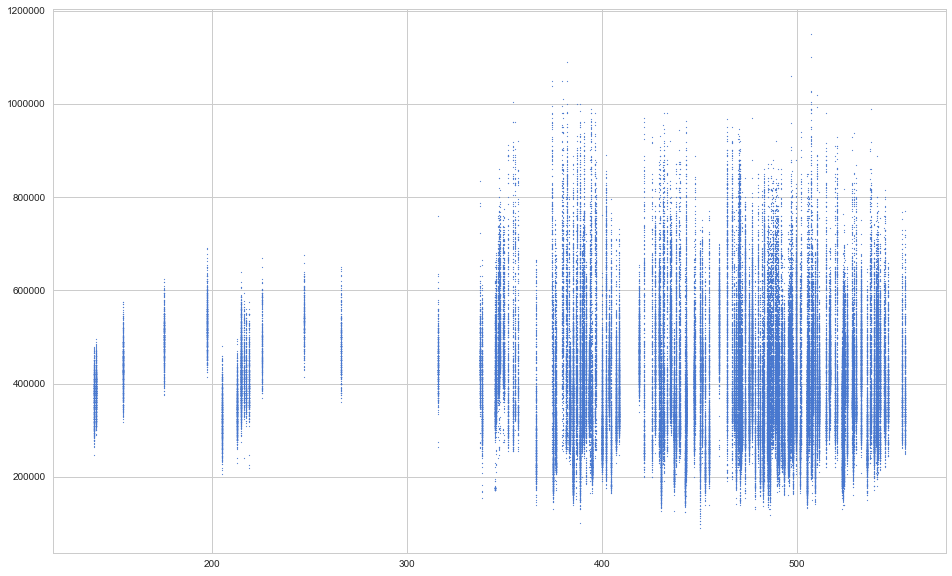

In [172]:
plt.scatter(checkdf2.popdensity,checkdf2.resale_price,s=0.8)
plt.show()

### Also checking for population density (wrt to total land area). Although from our earlier exploratory work, we know that density by residential area (or its limits) has a slightly stronger correlation with density by residential area. 

In [173]:
checkdf3 = checkdf.merge(right=townsize[['townyear','total_land_area']], how='left', on="townyear")
#checkdf3['popdensity'] = checkdf3.population / checkdf3.total_land_area
checkdf3.head(5)

block      flat_model flat_type  floor_area_sqm  lease_commence_date  \
0   309        IMPROVED    1 ROOM            31.0                 1977   
1   309        IMPROVED    1 ROOM            31.0                 1977   
2   309        IMPROVED    1 ROOM            31.0                 1977   
3   309        IMPROVED    1 ROOM            31.0                 1977   
4   216  NEW GENERATION    3 ROOM            73.0                 1976   

       month  remaining_lease  resale_price storey_range       street_name  \
0 1990-01-01              NaN        9000.0     10 TO 12  ANG MO KIO AVE 1   
1 1990-01-01              NaN        6000.0     04 TO 06  ANG MO KIO AVE 1   
2 1990-01-01              NaN        8000.0     10 TO 12  ANG MO KIO AVE 1   
3 1990-01-01              NaN        6000.0     07 TO 09  ANG MO KIO AVE 1   
4 1990-01-01              NaN       47200.0     04 TO 06  ANG MO KIO AVE 1   

         town  month_number month_name  year  bedrooms  bathrooms  \
0  ANG MO KIO             1    January  1990         1          1   
1  ANG MO KIO             1    January  1990         1          1   
2  ANG MO KIO             1    January  1990         1          1   
3  ANG MO KIO             1    January  1990         1          1   
4  ANG MO KIO             1    January  1990         2          2   

         townyear  population total_land_area  
0  ANG MO KIO1990         NaN             NaN  
1  ANG MO KIO1990         NaN             NaN  
2  ANG MO KIO1990         NaN             NaN  
3  ANG MO KIO1990         NaN             NaN  
4  ANG MO KIO1990         NaN             NaN

In [174]:
checkdf3.total_land_area.isnull().values.any()

True

In [175]:
checkdf3 = checkdf3.dropna(subset=['total_land_area'])

checkdf3.head(5)

block      flat_model flat_type  floor_area_sqm  lease_commence_date  \
539728   304  NEW GENERATION    4 ROOM            97.0                 1977   
539729   304  NEW GENERATION    4 ROOM            97.0                 1977   
539730   319  NEW GENERATION    3 ROOM            73.0                 1977   
539731   225  NEW GENERATION    3 ROOM            67.0                 1978   
539732   332  NEW GENERATION    3 ROOM            68.0                 1981   

            month  remaining_lease  resale_price storey_range  \
539728 2008-01-01              NaN      385000.0     04 TO 06   
539729 2008-01-01              NaN      363000.0     10 TO 12   
539730 2008-01-01              NaN      260000.0     04 TO 06   
539731 2008-01-01              NaN      185000.0     01 TO 03   
539732 2008-01-01              NaN      221000.0     04 TO 06   

             street_name        town  month_number month_name  year  bedrooms  \
539728  ANG MO KIO AVE 1  ANG MO KIO             1    January  2008         3   
539729  ANG MO KIO AVE 1  ANG MO KIO             1    January  2008         3   
539730  ANG MO KIO AVE 1  ANG MO KIO             1    January  2008         2   
539731  ANG MO KIO AVE 1  ANG MO KIO             1    January  2008         2   
539732  ANG MO KIO AVE 1  ANG MO KIO             1    January  2008         2   

        bathrooms        townyear  population total_land_area  
539728          2  ANG MO KIO2008    148200.0             638  
539729          2  ANG MO KIO2008    148200.0             638  
539730          2  ANG MO KIO2008    148200.0             638  
539731          2  ANG MO KIO2008    148200.0             638  
539732          2  ANG MO KIO2008    148200.0             638

In [176]:
checkdf3[checkdf3.total_land_area.isnull()]

Empty DataFrame
Columns: [block, flat_model, flat_type, floor_area_sqm, lease_commence_date, month, remaining_lease, resale_price, storey_range, street_name, town, month_number, month_name, year, bedrooms, bathrooms, townyear, population, total_land_area]
Index: []

In [177]:
pd.to_numeric(checkdf3['population'])
checkdf4 = checkdf3[checkdf3['total_land_area']!='na']
checkdf4[checkdf4['total_land_area']=='na']


Empty DataFrame
Columns: [block, flat_model, flat_type, floor_area_sqm, lease_commence_date, month, remaining_lease, resale_price, storey_range, street_name, town, month_number, month_name, year, bedrooms, bathrooms, townyear, population, total_land_area]
Index: []

In [178]:
checkdf4['total_land_area'] = pd.to_numeric(checkdf4['total_land_area']) 

In [179]:
checkdf4['popdensity'] = checkdf4['population']/checkdf4['total_land_area']

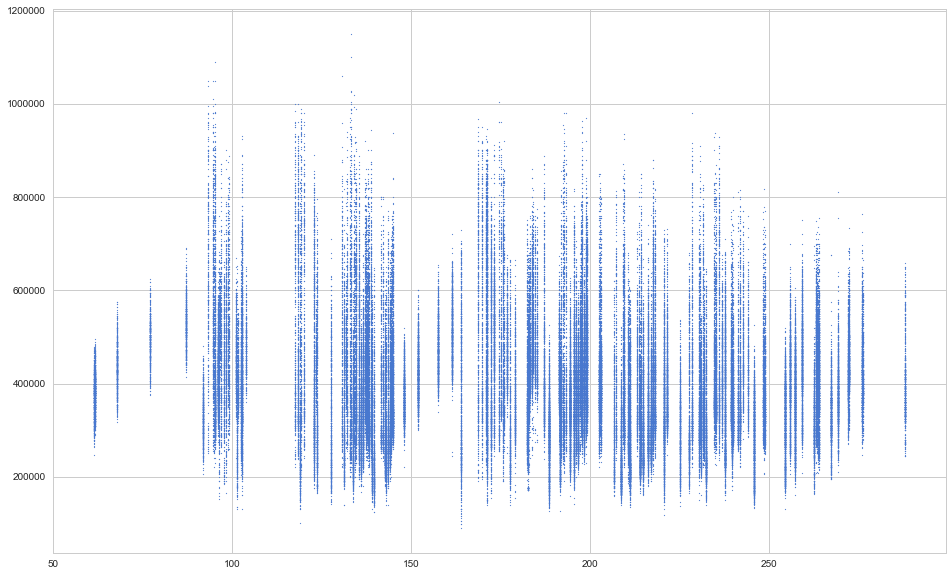

In [180]:
plt.scatter(checkdf4.popdensity,checkdf4.resale_price,s=0.8)
plt.show()

### Observation: There does not seem to be a strong correlation with population or population density, except for range and bounds.

### Adding population density, population and residential land area to the original full dataset. 

In [181]:
finaldf = checkdf2

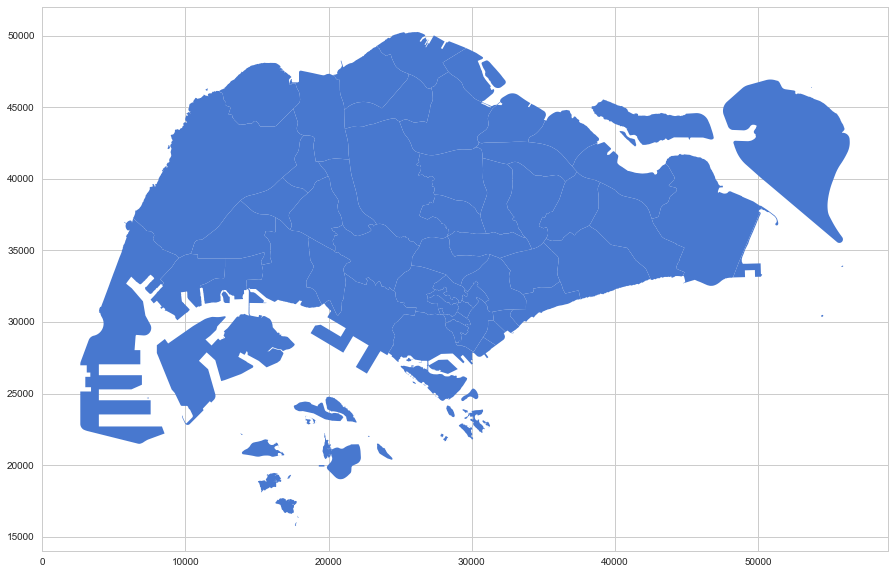

In [182]:
plt.rcParams['figure.figsize'] = [16, 10]
townmap = gpd.read_file('MP14_PLNG_AREA_WEB_PL.shp')
townmap.plot()

In [183]:
print(townmap)

    OBJECTID               PLN_AREA_N PLN_AREA_C CA_IND           REGION_N  \
0          1                   BISHAN         BS      N     CENTRAL REGION   
1          2              BUKIT BATOK         BK      N        WEST REGION   
2          3              BUKIT MERAH         BM      N     CENTRAL REGION   
3          4            BUKIT PANJANG         BP      N        WEST REGION   
4          5              BUKIT TIMAH         BT      N     CENTRAL REGION   
5          6  CENTRAL WATER CATCHMENT         CC      N       NORTH REGION   
6          7                   CHANGI         CH      N        EAST REGION   
7          8               CHANGI BAY         CB      N        EAST REGION   
8          9            CHOA CHU KANG         CK      N        WEST REGION   
9         10                 CLEMENTI         CL      N        WEST REGION   
10        11                  GEYLANG         GL      N     CENTRAL REGION   
11        12                   NOVENA         NV      N     CENT

In [184]:
sorted(townmap.PLN_AREA_N)

['ANG MO KIO',
 'BEDOK',
 'BISHAN',
 'BOON LAY',
 'BUKIT BATOK',
 'BUKIT MERAH',
 'BUKIT PANJANG',
 'BUKIT TIMAH',
 'CENTRAL WATER CATCHMENT',
 'CHANGI',
 'CHANGI BAY',
 'CHOA CHU KANG',
 'CLEMENTI',
 'DOWNTOWN CORE',
 'GEYLANG',
 'HOUGANG',
 'JURONG EAST',
 'JURONG WEST',
 'KALLANG',
 'LIM CHU KANG',
 'MANDAI',
 'MARINA EAST',
 'MARINA SOUTH',
 'MARINE PARADE',
 'MUSEUM',
 'NEWTON',
 'NORTH-EASTERN ISLANDS',
 'NOVENA',
 'ORCHARD',
 'OUTRAM',
 'PASIR RIS',
 'PAYA LEBAR',
 'PIONEER',
 'PUNGGOL',
 'QUEENSTOWN',
 'RIVER VALLEY',
 'ROCHOR',
 'SELETAR',
 'SEMBAWANG',
 'SENGKANG',
 'SERANGOON',
 'SIMPANG',
 'SINGAPORE RIVER',
 'SOUTHERN ISLANDS',
 'STRAITS VIEW',
 'SUNGEI KADUT',
 'TAMPINES',
 'TANGLIN',
 'TENGAH',
 'TOA PAYOH',
 'TUAS',
 'WESTERN ISLANDS',
 'WESTERN WATER CATCHMENT',
 'WOODLANDS',
 'YISHUN']

In [185]:
sorted(finaldf.town.unique())

['ANG MO KIO',
 'BEDOK',
 'BISHAN',
 'BUKIT BATOK',
 'BUKIT MERAH',
 'BUKIT PANJANG',
 'BUKIT TIMAH',
 'CENTRAL AREA',
 'CHOA CHU KANG',
 'CLEMENTI',
 'GEYLANG',
 'HOUGANG',
 'JURONG EAST',
 'JURONG WEST',
 'KALLANG/WHAMPOA',
 'LIM CHU KANG',
 'MARINE PARADE',
 'PASIR RIS',
 'PUNGGOL',
 'QUEENSTOWN',
 'SEMBAWANG',
 'SENGKANG',
 'SERANGOON',
 'TAMPINES',
 'TOA PAYOH',
 'WOODLANDS',
 'YISHUN']

### Changing names of towns (central area, kallang/whampoa) in our original dataset to match the names in the map dataset:

In [186]:
finaldf['town'] = finaldf['town'].replace({'CENTRAL AREA': 'CENTRAL WATER CATCHMENT', 'KALLANG/WHAMPOA': 'KALLANG'})


In [187]:
finaldf.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL WATER CATCHMENT', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG', 'SERANGOON',
       'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN', 'LIM CHU KANG',
       'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS', 'PUNGGOL'], dtype=object)

In [188]:
mapdf = finaldf.groupby('town',as_index=False).agg({'resale_price': 'median', 'popdensity': 'median', 'residential_land_area': 'max'})
mapdf

town  resale_price  popdensity  residential_land_area
0                ANG MO KIO      200000.0  530.388693                  283.0
1                     BEDOK      223000.0  493.382353                  418.0
2                    BISHAN      370000.0  386.627907                  172.0
3               BUKIT BATOK      228000.0  388.659794                  291.0
4               BUKIT MERAH      258000.0  470.512821                  312.0
5             BUKIT PANJANG      280000.0  507.894737                  228.0
6               BUKIT TIMAH      390000.0         NaN                    NaN
7   CENTRAL WATER CATCHMENT      222000.0         NaN                    NaN
8             CHOA CHU KANG      313000.0  516.612378                  307.0
9                  CLEMENTI      215000.0  375.757576                  203.0
10                  GEYLANG      210000.0  440.186916                  214.0
11                  HOUGANG      268000.0  490.463215                  367.0
12              JURONG EAST      236650.0  490.303030                  165.0
13              JURONG WEST      252000.0  528.958333                  480.0
14                  KALLANG      241000.0  524.500000                  210.0
15             LIM CHU KANG       61750.0         NaN                    NaN
16            MARINE PARADE      280000.0         NaN                    NaN
17                PASIR RIS      369344.0  346.540881                  318.0
18                  PUNGGOL      430000.0  175.118483                  422.0
19               QUEENSTOWN      172000.0  396.666667                  210.0
20                SEMBAWANG      348000.0  214.826498                  331.0
21                 SENGKANG      396000.0  418.891688                  397.0
22                SERANGOON      275000.0  484.615385                  163.0
23                 TAMPINES      293000.0  471.600000                  549.0
24                TOA PAYOH      220000.0  501.904762                  248.0
25                WOODLANDS      275000.0  447.238095                  525.0
26                   YISHUN      225000.0  407.289294                  439.0

In [189]:
townpop.town_or_estate.unique()

array(['Ang Mo Kio', 'Bedok', 'Bishan', 'Bukit Batok', 'Bukit Merah',
       'Bukit Panjang', 'Bukit Timah', 'Choa Chu Kang', 'Central Area',
       'Clementi', 'Geylang', 'Hougang', 'Jurong East', 'Jurong West',
       'Kallang/Whampoa', 'Marine Parade', 'Pasir Ris', 'Punggol',
       'Queenstown', 'Sembawang', 'Sengkang', 'Serangoon', 'Tampines',
       'Toa Payoh', 'Woodlands', 'Yishun', 'Total'], dtype=object)

In [190]:
sorted(finaldf.town.unique())

['ANG MO KIO',
 'BEDOK',
 'BISHAN',
 'BUKIT BATOK',
 'BUKIT MERAH',
 'BUKIT PANJANG',
 'BUKIT TIMAH',
 'CENTRAL WATER CATCHMENT',
 'CHOA CHU KANG',
 'CLEMENTI',
 'GEYLANG',
 'HOUGANG',
 'JURONG EAST',
 'JURONG WEST',
 'KALLANG',
 'LIM CHU KANG',
 'MARINE PARADE',
 'PASIR RIS',
 'PUNGGOL',
 'QUEENSTOWN',
 'SEMBAWANG',
 'SENGKANG',
 'SERANGOON',
 'TAMPINES',
 'TOA PAYOH',
 'WOODLANDS',
 'YISHUN']

In [191]:
townsize.town.unique()

array(['Ang Mo Kio', 'Bedok', 'Bishan', 'Bukit Batok', 'Bukit Merah',
       'Bukit Panjang', 'Choa Chu Kang', 'Clementi', 'Geylang', 'Hougang',
       'Jurong East', 'Jurong West', 'Kallang/Whampoa', 'Pasir Ris',
       'Punggol', 'Queenstown', 'Sembawang', 'Sengkang', 'Serangoon',
       'Tampines', 'Toa Payoh', 'Woodlands', 'Yishun', 'Other Estates'], dtype=object)

### The land area dataset I found does not have bukit timah, water catchment/central area, marine parade, lim chu kang. so they are NaNs in the summary dataset mapdf. Examining why Kallang returned NaN:

In [122]:
checkdf[checkdf['town']=='KALLANG/WHAMPOA']

block      flat_model  flat_type  floor_area_sqm  lease_commence_date  \
979        9        STANDARD     2 ROOM            50.0                 1970   
980        2        IMPROVED     3 ROOM            59.0                 1976   
981       94  NEW GENERATION     3 ROOM            68.0                 1979   
982       95  NEW GENERATION     3 ROOM            68.0                 1979   
983      468        IMPROVED     3 ROOM            60.0                 1979   
984      801        IMPROVED     3 ROOM            59.0                 1979   
985       49  NEW GENERATION     3 ROOM            68.0                 1979   
986       46  NEW GENERATION     3 ROOM            68.0                 1982   
987        1        IMPROVED     3 ROOM            68.0                 1979   
988        2        IMPROVED     3 ROOM            68.0                 1979   
989       97        IMPROVED     3 ROOM            66.0                 1980   
990       44        STANDARD     3 ROOM            63.0                 1981   
991       12        IMPROVED     3 ROOM            66.0                 1980   
992       14  NEW GENERATION     3 ROOM           103.0                 1984   
993       20        IMPROVED     3 ROOM            59.0                 1975   
994       20        IMPROVED     3 ROOM            59.0                 1975   
995       20  NEW GENERATION     3 ROOM            67.0                 1984   
996       28        STANDARD     3 ROOM            56.0                 1971   
997       28        STANDARD     3 ROOM            56.0                 1971   
998       24        IMPROVED     3 ROOM            78.0                 1972   
999       26        IMPROVED     3 ROOM            71.0                 1972   
1000      28        IMPROVED     3 ROOM            71.0                 1972   
1001      34        IMPROVED     3 ROOM            68.0                 1972   
1002      45        IMPROVED     3 ROOM            66.0                 1972   
1003      45        IMPROVED     3 ROOM            66.0                 1972   
1004      38         TERRACE     3 ROOM            83.0                 1972   
1005      77        IMPROVED     3 ROOM            59.0                 1973   
1006      75        IMPROVED     3 ROOM            65.0                 1974   
1007      75        IMPROVED     3 ROOM            65.0                 1974   
1008      75        IMPROVED     3 ROOM            65.0                 1974   
...      ...             ...        ...             ...                  ...   
774308    98        IMPROVED     3 ROOM            65.0                 1974   
774309    82        IMPROVED     3 ROOM            66.0                 1974   
774310    34        IMPROVED     3 ROOM            68.0                 1972   
774311    28        IMPROVED     4 ROOM            83.0                 1972   
774312   38C         MODEL A     4 ROOM            89.0                 2012   
774313     8            DBSS     4 ROOM            95.0                 2011   
774314     9            DBSS     4 ROOM            94.0                 2011   
774315    39         MODEL A     4 ROOM           100.0                 1997   
774316   815         MODEL A     4 ROOM            90.0                 2003   
774317    12  NEW GENERATION     4 ROOM           135.0                 1982   
774318   120      SIMPLIFIED     4 ROOM            84.0                 1987   
774319  108C         MODEL A     4 ROOM            95.0                 2005   
774320     1        IMPROVED     4 ROOM            82.0                 1976   
774321    10         MODEL A     4 ROOM           104.0                 1985   
774322    3D         MODEL A     4 ROOM            90.0                 2006   
774323    3B         MODEL A     4 ROOM            90.0                 2006   
774324    2A         MODEL A     4 ROOM            90.0                 2006   
774325    3A         MODEL A     4 ROOM            90.0                 2006   
774326 

### It was missing because of the discrepancy in the naming of Kallang/Whampoa in the housing dataset and the population dataset. Fixing it retroactively in previous cells.

In [192]:
mapdf

town  resale_price  popdensity  residential_land_area
0                ANG MO KIO      200000.0  530.388693                  283.0
1                     BEDOK      223000.0  493.382353                  418.0
2                    BISHAN      370000.0  386.627907                  172.0
3               BUKIT BATOK      228000.0  388.659794                  291.0
4               BUKIT MERAH      258000.0  470.512821                  312.0
5             BUKIT PANJANG      280000.0  507.894737                  228.0
6               BUKIT TIMAH      390000.0         NaN                    NaN
7   CENTRAL WATER CATCHMENT      222000.0         NaN                    NaN
8             CHOA CHU KANG      313000.0  516.612378                  307.0
9                  CLEMENTI      215000.0  375.757576                  203.0
10                  GEYLANG      210000.0  440.186916                  214.0
11                  HOUGANG      268000.0  490.463215                  367.0
12              JURONG EAST      236650.0  490.303030                  165.0
13              JURONG WEST      252000.0  528.958333                  480.0
14                  KALLANG      241000.0  524.500000                  210.0
15             LIM CHU KANG       61750.0         NaN                    NaN
16            MARINE PARADE      280000.0         NaN                    NaN
17                PASIR RIS      369344.0  346.540881                  318.0
18                  PUNGGOL      430000.0  175.118483                  422.0
19               QUEENSTOWN      172000.0  396.666667                  210.0
20                SEMBAWANG      348000.0  214.826498                  331.0
21                 SENGKANG      396000.0  418.891688                  397.0
22                SERANGOON      275000.0  484.615385                  163.0
23                 TAMPINES      293000.0  471.600000                  549.0
24                TOA PAYOH      220000.0  501.904762                  248.0
25                WOODLANDS      275000.0  447.238095                  525.0
26                   YISHUN      225000.0  407.289294                  439.0

In [193]:
t1 = checkdf2[checkdf2['town']=='ANG MO KIO']
t1.resale_price.median()

200000.0

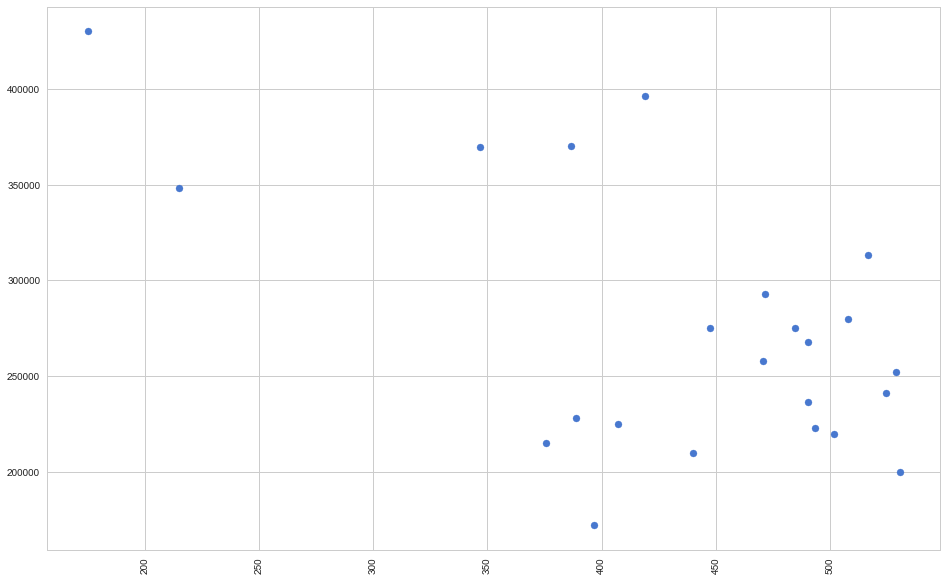

In [198]:
plt.xticks(rotation=90)
plt.scatter(mapdf.popdensity,mapdf.resale_price)
plt.show()

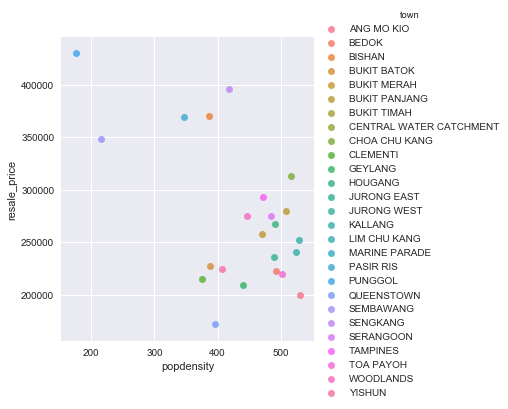

In [206]:
plt.figure(figsize=(20,10))
sns.set()
sns.lmplot( x="popdensity", y="resale_price", data=mapdf, fit_reg=False, hue='town', scatter='true',legend=True)
plt.show()

### There is an obvious relationship with population density. There are about 3 clusters that we can see from visual inspection. As expected, highly crowded areas tend to be cheaper than low density area.

### There are probably other factors which lead to differential pricing for similaryly populated area, such as flat type. Let us plot the same plot but colored by flat type

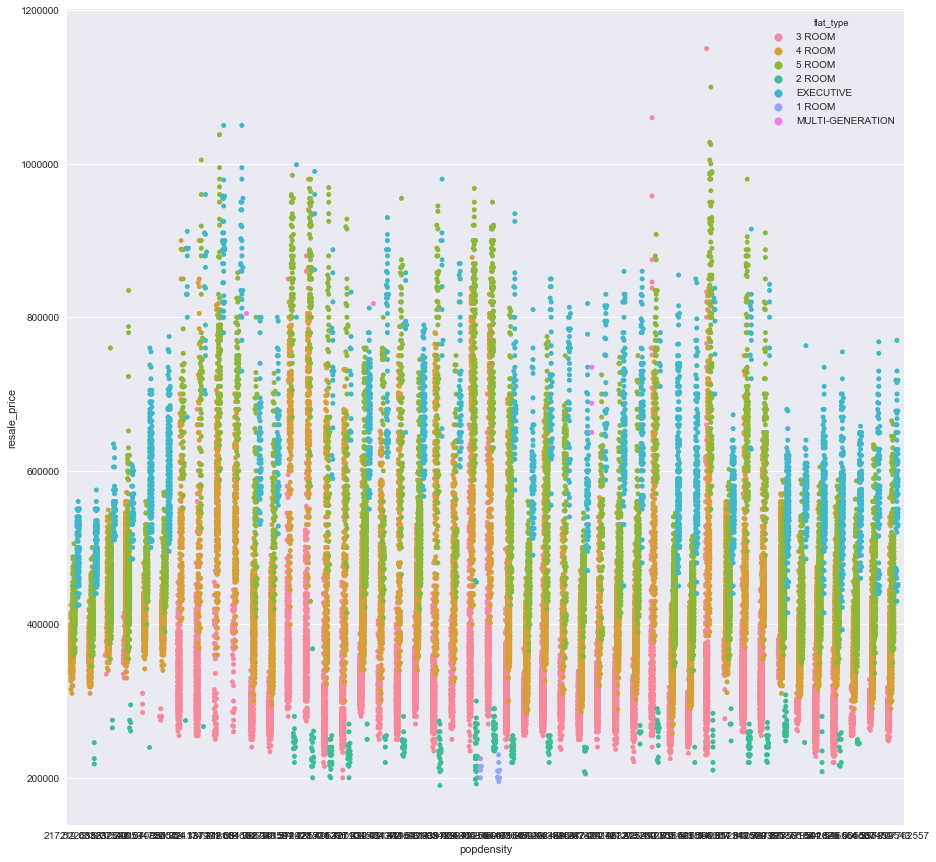

In [220]:
plt.figure(figsize=(15,15))
sns.set()
finaldfclean = finaldf.dropna()
plotdf3 = finaldfclean.sample(frac=0.1,random_state=1)
sns.swarmplot(x="popdensity", y="resale_price",data=finaldfclean,hue="flat_type",dodge=True)
plt.show()

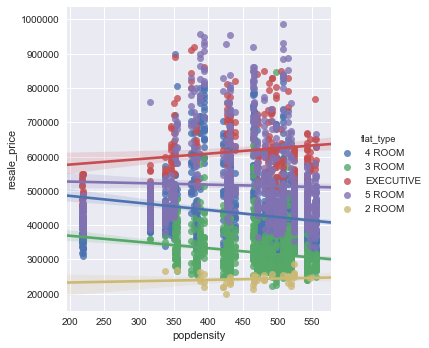

In [218]:
plt.figure(figsize=(20,15))
finaldfclean = finaldf.dropna()
plotdf3 = finaldfclean.sample(frac=0.1,random_state=1)
sns.lmplot(x="popdensity", y="resale_price", data=finaldfclean, fit_reg=True, hue='flat_type', legend=True)
plt.show()

In [221]:
merged = townmap.merge(mapdf,how='left', left_on='PLN_AREA_N', right_on='town')
merged.describe()

OBJECTID        X_ADDR        Y_ADDR     SHAPE_Leng    SHAPE_Area  \
count  55.00000     55.000000     55.000000      55.000000  5.500000e+01   
mean   28.00000  27626.514455  36003.895435   20852.206381  1.421718e+07   
std    16.02082   9376.383074   5846.945642   17766.545772  1.483919e+07   
min     1.00000   5687.971100  25069.982700    4385.926738  8.302731e+05   
25%    14.50000  21930.252050  31596.094450   13238.119200  6.630102e+06   
50%    28.00000  28529.657200  34689.003700   16932.546528  1.010054e+07   
75%    41.50000  32091.716150  40147.767300   22021.754793  1.665223e+07   
max    55.00000  50424.792300  48594.635600  111546.683409  6.974830e+07   

        resale_price  popdensity  residential_land_area  
count      27.000000   23.000000              23.000000  
mean   268583.111111  435.171283             315.304348  
std     78966.232032   93.298866             116.342924  
min     61750.000000  175.118483             163.000000  
25%    222500.000000  392.663230             212.000000  
50%    258000.000000  470.512821             307.000000  
75%    303000.000000  497.643557             407.500000  
max    430000.000000  530.388693             549.000000

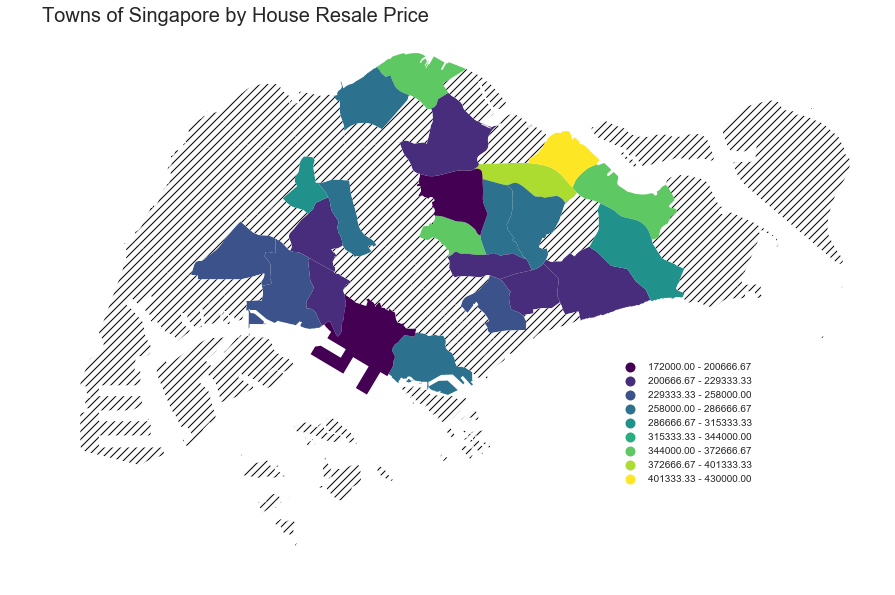

In [223]:
colors = 9
cmap = 'viridis'
figsize = (16, 10)

ax = merged.dropna().plot(column='resale_price', cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)
merged[merged.isnull().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///', )

ax.get_legend().set_bbox_to_anchor((.85, .4))
ax.set_title("Towns of Singapore by House Resale Price", fontdict={'fontsize': 20}, loc='left')
ax.set_axis_off()

#gdf.plot(ax, marker='*', color='yellow', markersize=15)

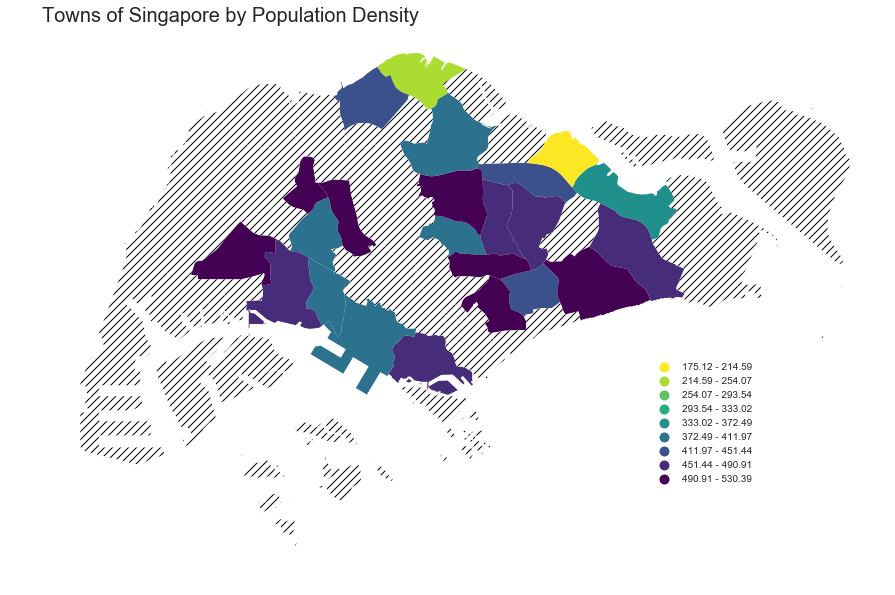

In [224]:
colors = 9
cmap = 'viridis_r'
figsize = (16, 10)

ax = merged.dropna().plot(column='popdensity', cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)
merged[merged.isnull().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///',)

ax.get_legend().set_bbox_to_anchor((.85, .4))
ax.set_title("Towns of Singapore by Population Density", fontdict={'fontsize': 20}, loc='left')
ax.set_axis_off()

#gdf.plot(ax, marker='*', color='yellow', markersize=15)

### Punggol in yellow seems to be the least populated as well as most expensive area. There is also a correspondence between the denser and cheaper areas. Are there any areas which are dense but expensive? Sengkang is one, with a median population density of 418 units and price range in 396000.0 units. Why is that?


### Well, maybe it's a function of amenities such as metros and schools, connectivity and proximity to the commercial center (downtown), posher and better models of flats available etc. 

### Let us take a look at the metro stations in Singapore

In [234]:
gdf = gpd.read_file('MRTLRTStnPtt.shp')
print(gdf)

     OBJECTID                     STN_NAME       STN_NO  \
0           1            EUNOS MRT STATION          EW7   
1           2   CHINESE GARDEN MRT STATION         EW25   
2           3           KHATIB MRT STATION         NS14   
3           4           KRANJI MRT STATION          NS7   
4           5          REDHILL MRT STATION         EW18   
5           6          YEW TEE MRT STATION          NS5   
6           7          PIONEER MRT STATION         EW28   
7           8     COMMONWEALTH MRT STATION         EW20   
8           9       PAYA LEBAR MRT STATION          EW8   
9          10            SIMEI MRT STATION          EW3   
10         11         TAMPINES MRT STATION          EW2   
11         12        ADMIRALTY MRT STATION         NS10   
12         13           YISHUN MRT STATION         NS13   
13         14        PASIR RIS MRT STATION          EW1   
14         15         CLEMENTI MRT STATION         EW23   
15         16         ALJUNIED MRT STATION          EW9 

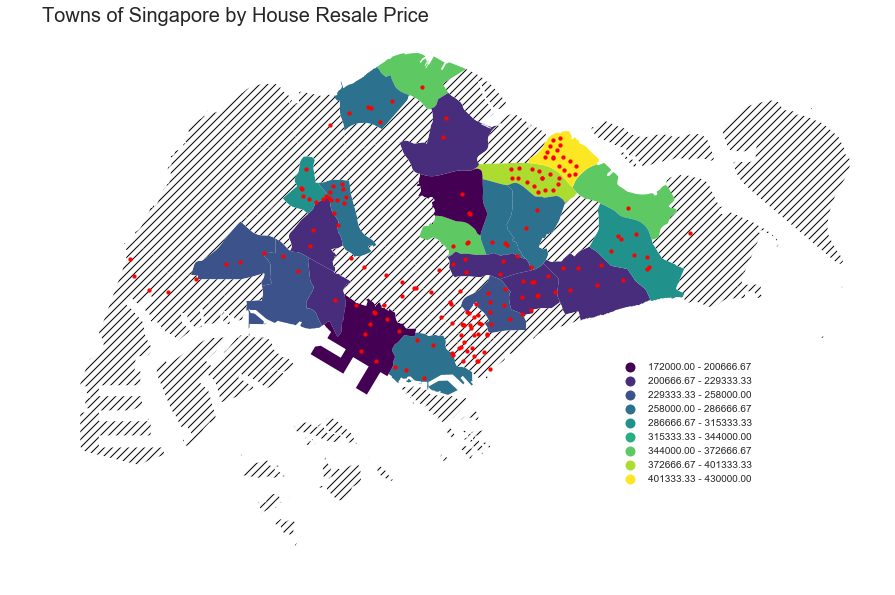

In [235]:
colors = 9
cmap = 'viridis'
figsize = (16, 10)

ax = merged.dropna().plot(column='resale_price', cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)
merged[merged.isnull().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///', )

ax.get_legend().set_bbox_to_anchor((.85, .4))
ax.set_title("Towns of Singapore by House Resale Price", fontdict={'fontsize': 20}, loc='left')
ax.set_axis_off()

base = ax

gdf.plot(ax=base, marker='o', color='red', markersize=15)

### Sengkang and Pullong seem to have a high density of MRT stations as compared to other housing areas, similar to the density in downtown core. And even though Sembawang has only 1 MRT station, it's very low in population density, and perhaps has other amenities and swankier flats.

## Yearly Variations

### Before delving into number densities of MRT stations, let's take a quick look at where we stand with the newly derived variables. Starting with year

In [240]:
finaldf.flat_type.unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION'], dtype=object)

In [237]:
df = finaldf[finaldf['flat_type']=='3 ROOM']

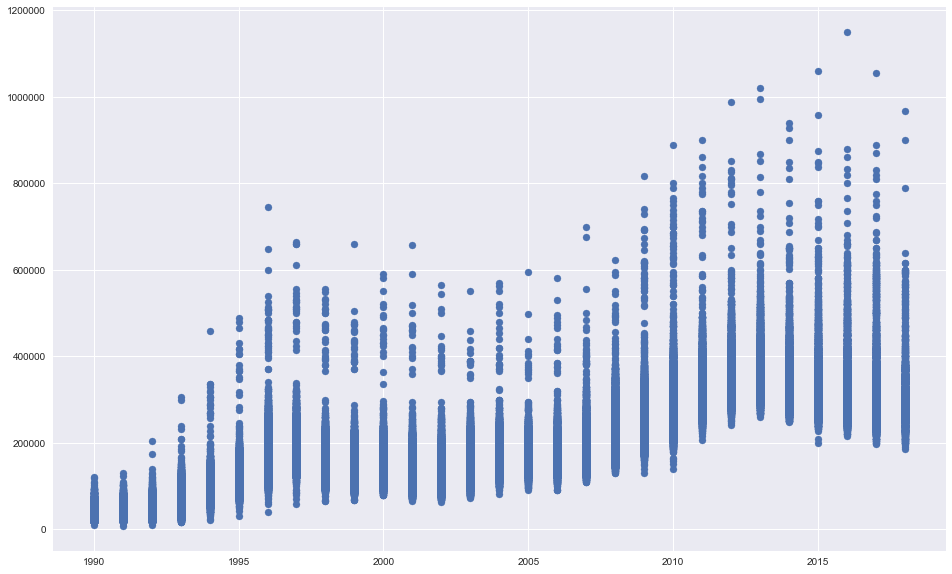

In [239]:
plt.scatter(df.year,df.resale_price)
plt.show()

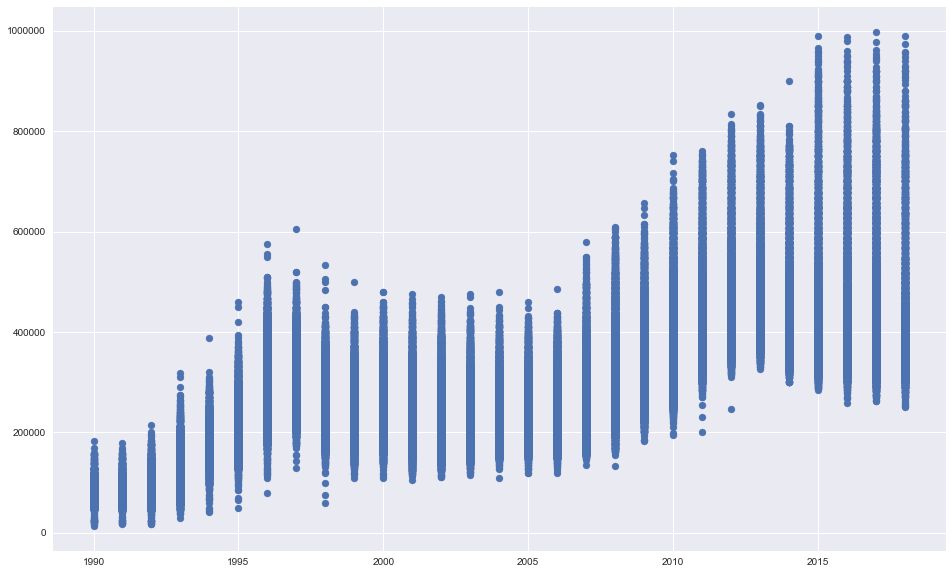

In [242]:
df1 = finaldf[finaldf['flat_type']=='4 ROOM']
plt.scatter(df1.year,df1.resale_price)
plt.show()


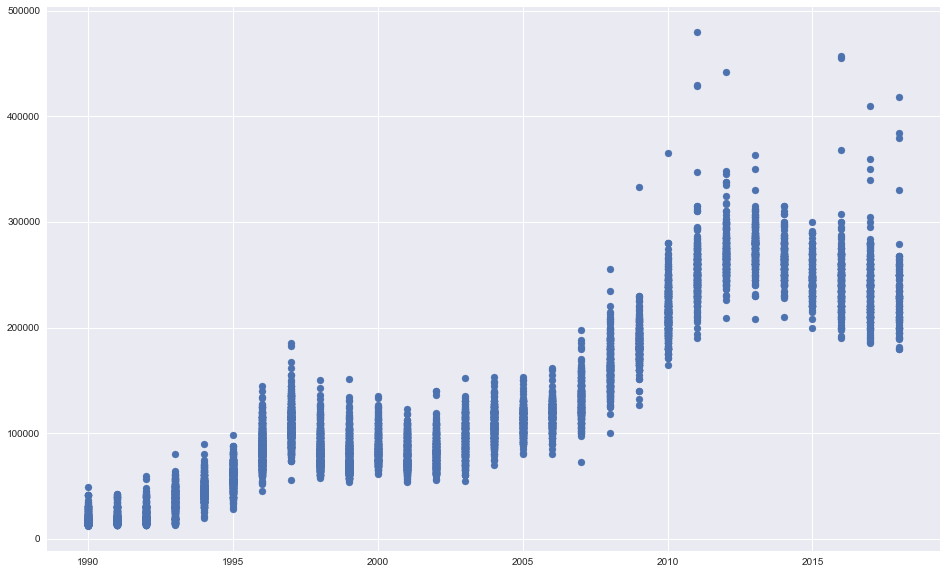

In [243]:
df2 = finaldf[finaldf['flat_type']=='2 ROOM']
plt.scatter(df2.year,df2.resale_price)
plt.show()

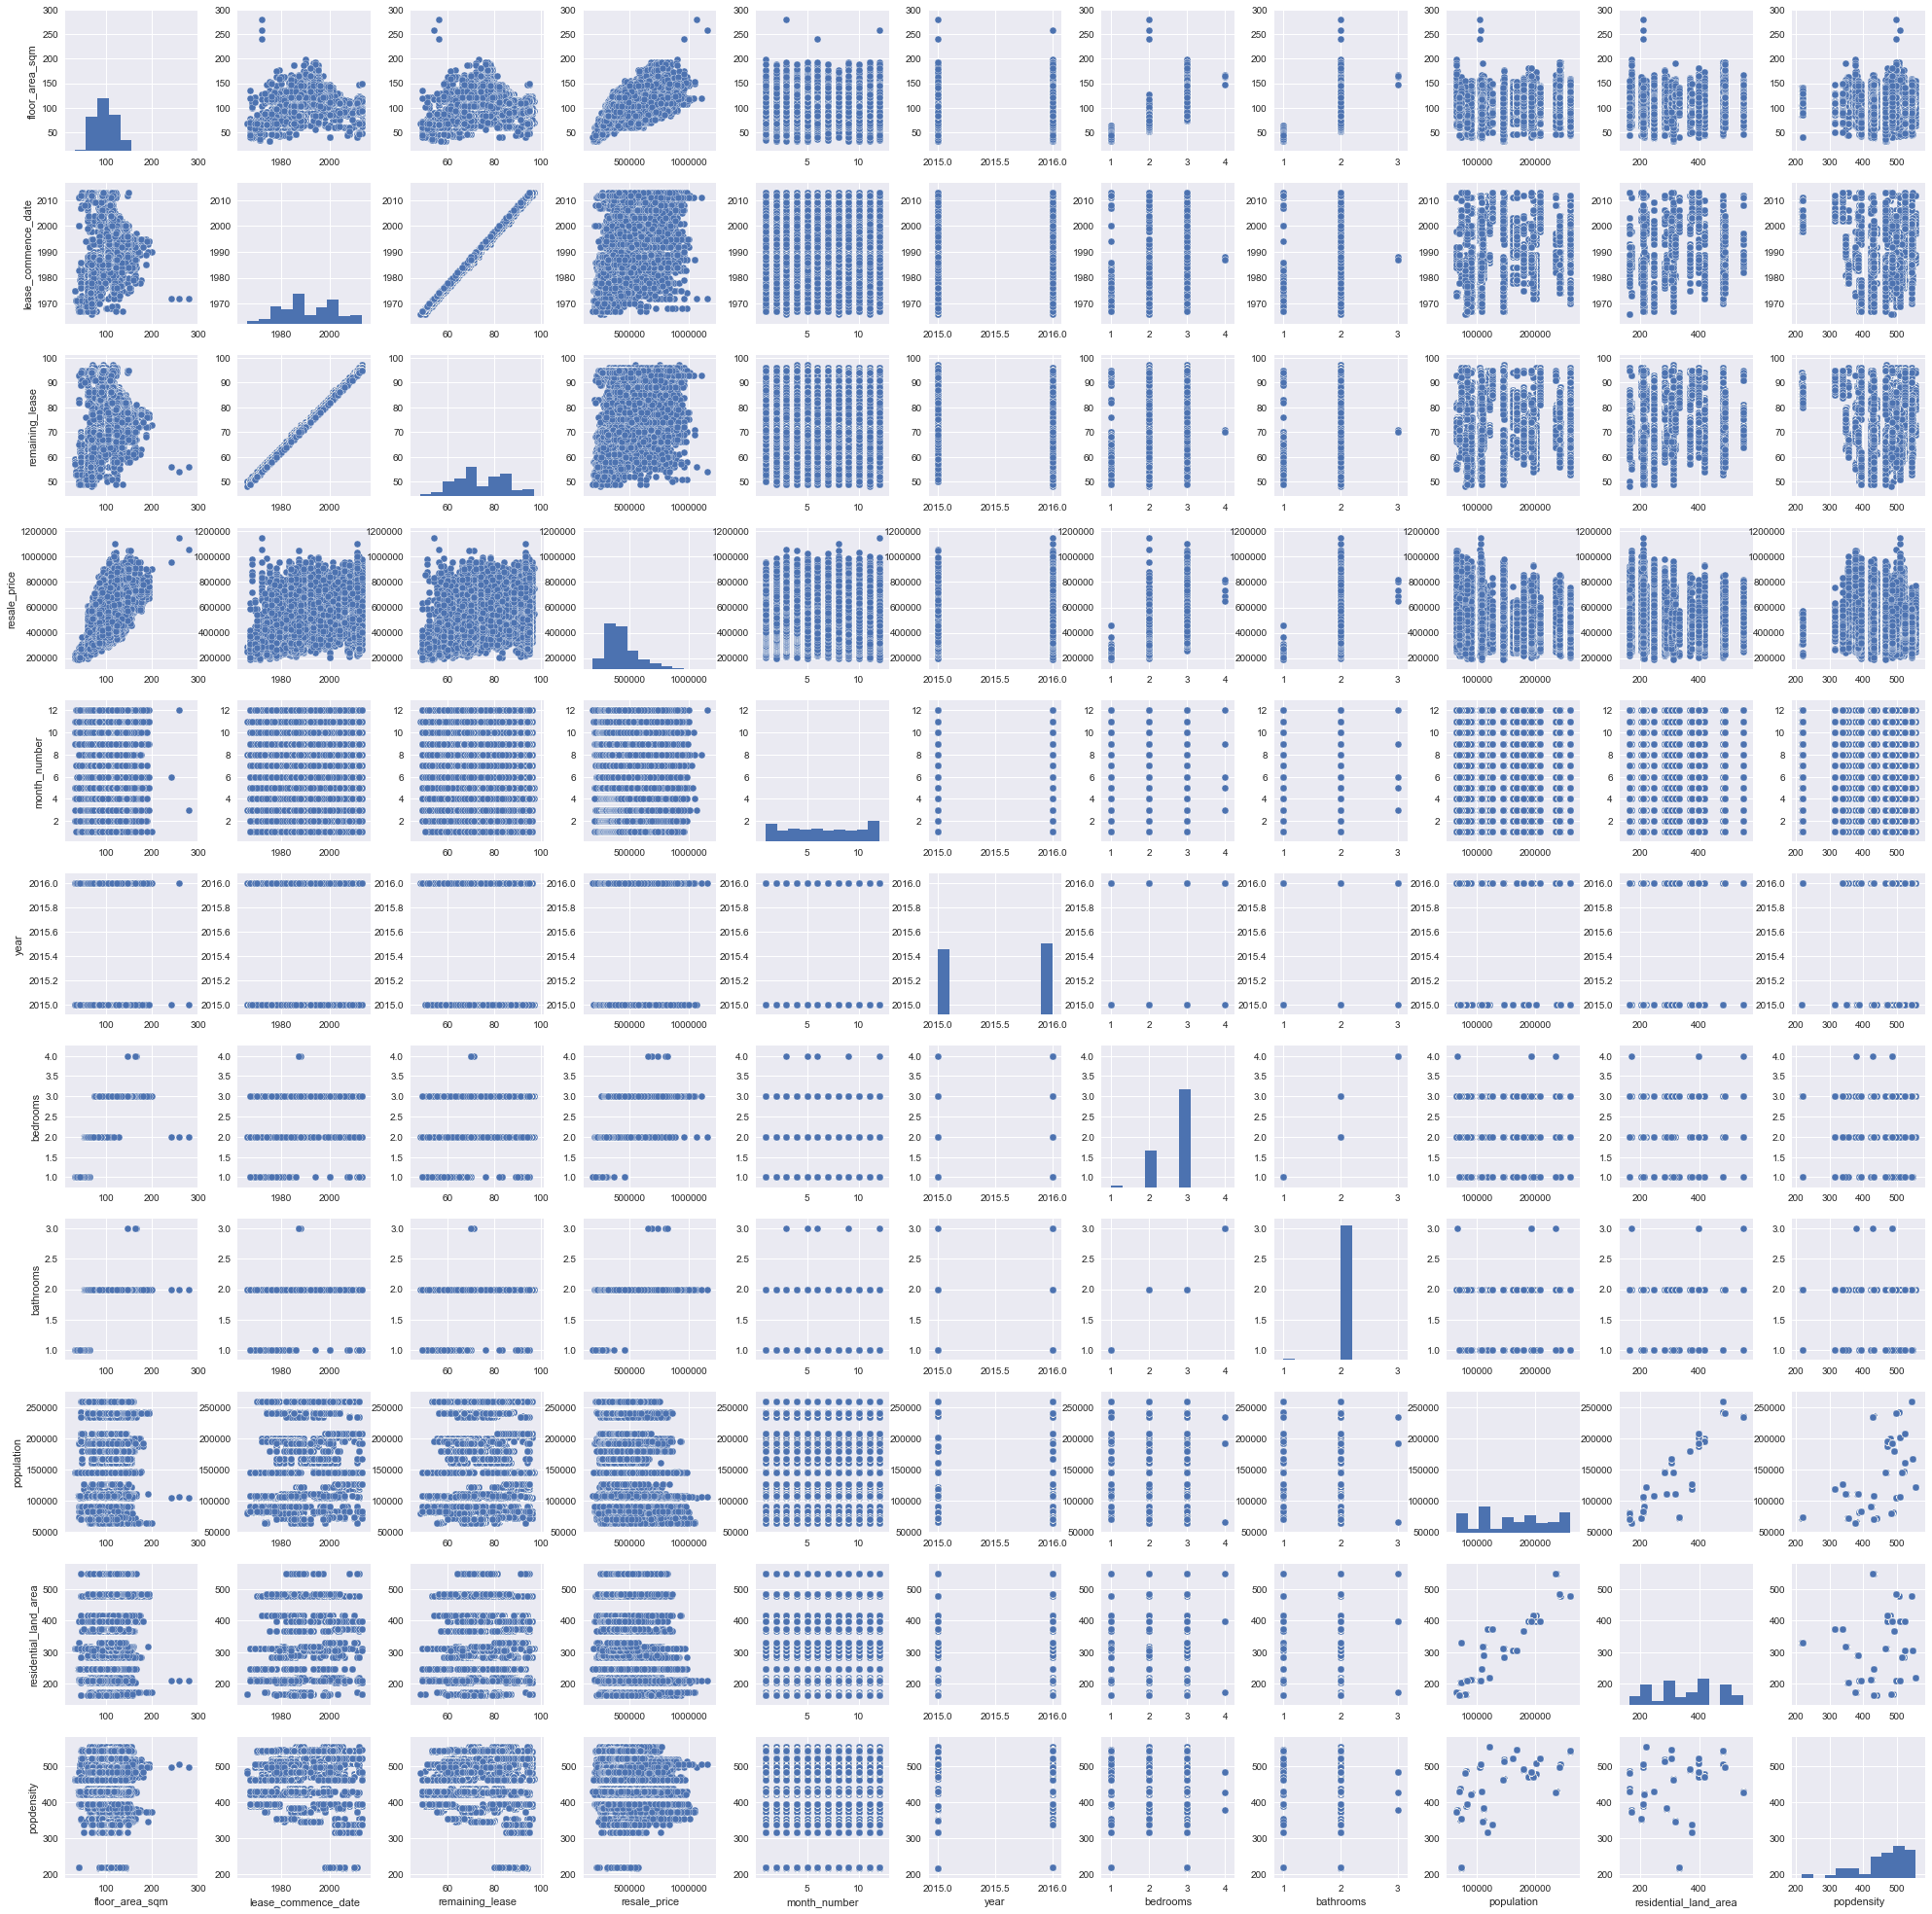

In [245]:
cols = list(finaldfclean.columns.values)
sns.pairplot(finaldfclean[cols], size=2.5)
plt.show()

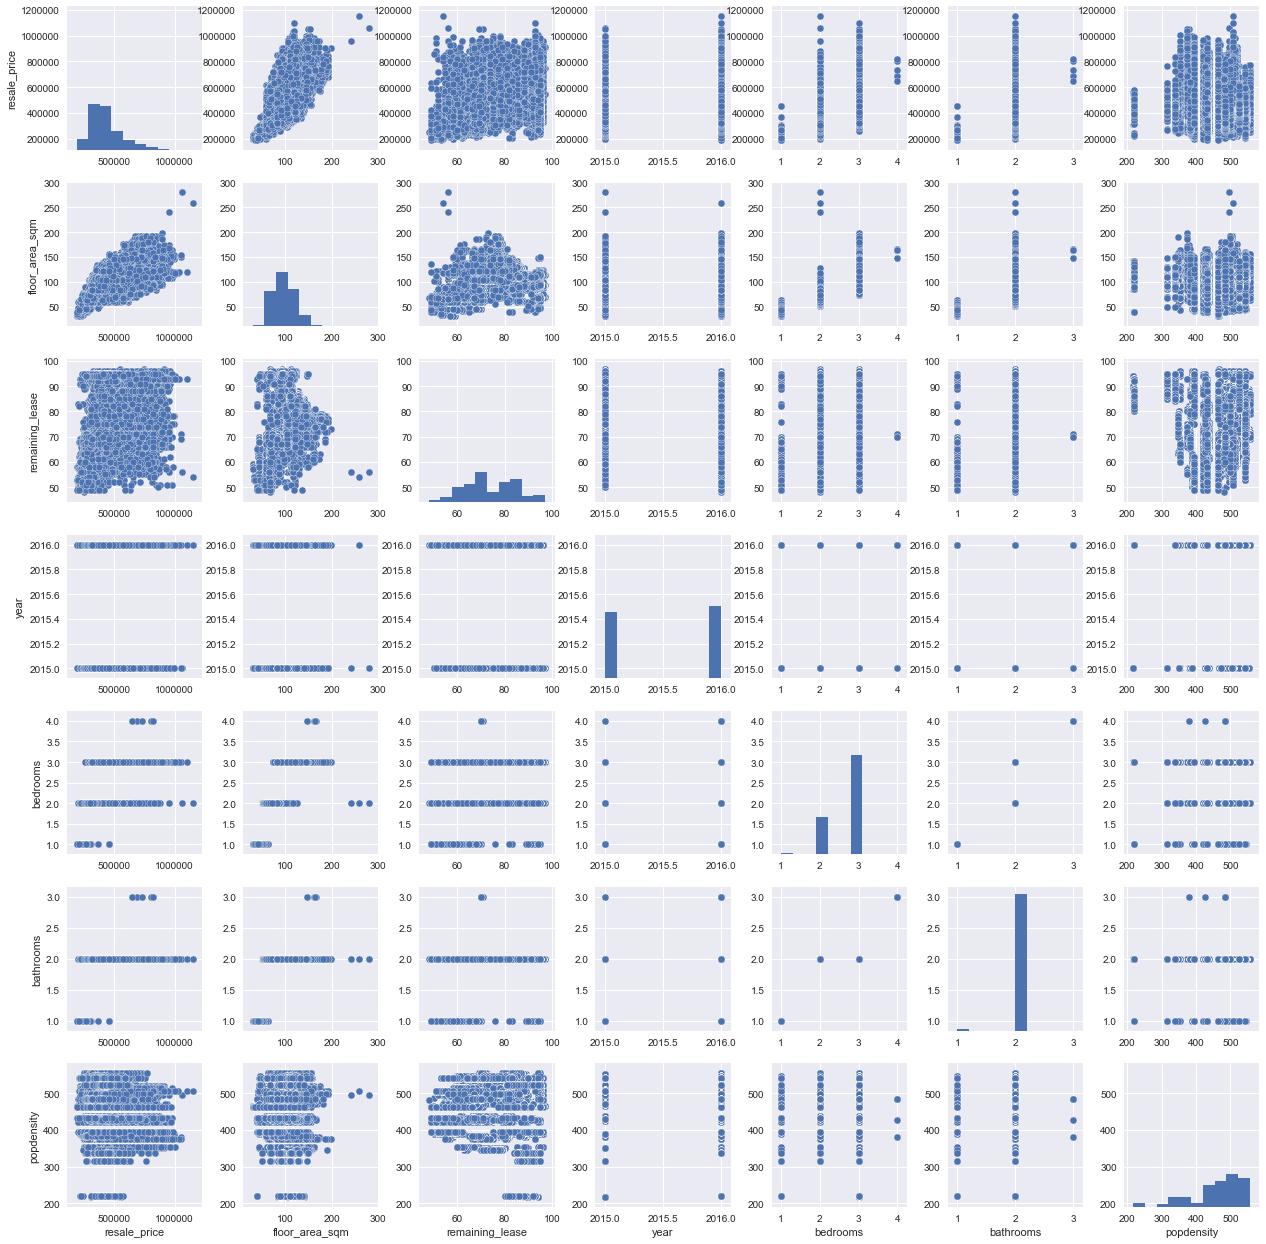

In [246]:
cols = ['resale_price','floor_area_sqm','remaining_lease','year','bedrooms','bathrooms','popdensity']
sns.pairplot(finaldfclean[cols], size=2.5)
plt.show()